# Part A
https://www.statsmodels.org/stable/tsa.html

Things to take note:

Explanation of univariate vs multivariate time series forecasting

EDA (remember to analyse)
- Check whether it is stationary? (Augmented Dickey-Fuller (A) Test) What do we do next?
- Check for Trend and analyse (upward/downward, linear/non-linear)
- Check for Seasonality? What do we do next?
- Check for noise and random variations
- check for outlier
- Test for causality (Granger’s causality test)
    - Conceptually, Granger causality provides a much more stringent criterion for causation (or information flow) than simply observing high correlation with some lag-lead relationship (Damos, 2016)
- Is the target variable autocorrelated? ACF & PACF Test

- Decomposition
    - Secular trend, which describe the movement along the term;
    - Seasonal variations, which represent seasonal changes;
    - Cyclical fluctuations, which correspond to periodical but not seasonal variations;
    - Irregular variations, which are other nonrandom sources of variations of series.

Types of models (research on how to evaluate these models)
Univariate
- Autoregression (AR)
- Moving Average (MA)
- Autoregressive Moving Average (ARMA)
- Autoregressive Integrated Moving Average (ARIMA) # might be the best model
- Seasonal Autoregressive Integrated Moving-Average (SARIMA)


Multivariate
- Vector Autoregressions (VAR) note (Forecast Error Variance Decomposition (FEVD))
- Vector Moving Average (VMA)
- Vector Auto-Regressive Integrated Moving Average (VARIMA)
- Vector Error Correction Model (VECM)
- - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
- Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.


Smoothing
    - Exponential Smoothing
    - Double Exponential Smoothing
    - Triple Exponential Smoothing


Modelling and Data
- Split train data into train and eval
    - backtesting
    - Rolling window analysis
- Additive vs Multiplicative

Evaluation metrics
- RMSE
- Rolling window analysis
- Test for residuals
    - The “residuals” in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values:
        Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:

        The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
        The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.
    - ACF & PACF Plot of residuals (Portmanteau tests for autocorrelation?)

- Akaike information criterion (AIC)
- Bayesian information criterion (BIC)

look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values

Citations
- Damos, P. (2016). Using multivariate cross correlations, Granger causality and graphical models to quantify spatiotemporal synchronization and causality between pest populations. BMC Ecology, 16(1). doi:10.1186/s12898-016-0087-7.
[Accessed 4 Jul. 2022]
- Jie, T. (2021). Time Series Analysis with Statsmodels. [online] Medium. Available at: https://towardsdatascience.com/time-series-analysis-with-statsmodels-12309890539a
[Accessed 4 Jul. 2022]
- US EPA,OAR (2016). Nitrogen Dioxide (NO2) Pollution | US EPA. [online] US EPA. Available at: https://www.epa.gov/no2-pollution
[Accessed 21 Jul. 2022].
- Duan, Y., Liu, X., Li, H., Yan, S., Yan, M., Mang, Y. and Yin, P. (2019). Season and temperature modify the short-term effect of nitrogen dioxide on cardiovascular mortality: a time-series study. The Lancet, [online] 394, p.S57. doi:10.1016/s0140-6736(19)32393-1.
[Accessed 21 Jul. 2022].
- Rajan, S. (2021). Multivariate Time Series Anomaly Detection using VAR model. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/08/multivariate-time-series-anomaly-detection-using-var-model/ [Accessed 12 Aug. 2022].
- Defaux, C. (2020). Using the Durbin-Watson (DW) test for time-series data. [online] Medium. Available at: https://medium.com/@cdefaux/using-the-durbin-watson-dw-test-for-time-series-data-b87bd884fbbd [Accessed 12 Aug. 2022].


## Data Cleaning & EDA

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale=2)
# train
df = pd.read_csv('../data/train.csv',parse_dates=True,na_values=-200)
df_plot = pd.read_csv('../data/train.csv',parse_dates=True,na_values=-200)
dfs = pd.read_csv('../data/train.csv',parse_dates=True)

df  = df.iloc[: , :-2]
df_plot  = df_plot.iloc[: , :-2]

print('Missing Values')
print(df.isnull().sum())
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Date'] = [time.date() for time in df['Date']]
df_plot['Date'] = pd.to_datetime(df_plot['Date'],dayfirst=True)
df_plot['Date'] = [time.date() for time in df_plot['Date']]

gas_co = df.loc[df['Gas'] == 'CO']
gas_HC = df.loc[df['Gas'] == 'HC']
gas_NO2 = df.loc[df['Gas'] == 'NO2']
gas_O3 = df.loc[df['Gas'] == 'O3']

display(df)

# test
df_test = pd.read_csv('../data/test.csv',parse_dates=True)

df_test  = df_test.iloc[: , :-2]
df_test = df_test.drop(columns=['id'])

print('Missing Values')
print(df_test.isnull().sum())
df_test['Date'] = pd.to_datetime(df_test['Date'],dayfirst=True)
df_test['Date'] = [time.date() for time in df_test['Date']]

display(df_test)

Missing Values
Date      0
T        24
RH       24
Gas       0
Value     0
dtype: int64


Date          T         RH Gas        Value
0     2016-03-15  12.020833  54.883334  CO  1053.200000
1     2016-03-16   9.833333  64.069791  CO   995.250000
2     2016-03-17  11.292708  51.107292  CO  1025.250000
3     2016-03-18  12.866319  51.530903  CO  1064.444444
4     2016-03-19  16.016667  48.843750  CO  1088.741667
...          ...        ...        ...  ..          ...
1307  2017-02-01   5.267708  39.614930  O3   553.180556
1308  2017-02-02 -55.515972 -24.010417  O3   343.500000
1309  2017-02-03 -14.272917  28.563542  O3   334.458333
1310  2017-02-04   4.848611  37.832986  O3   379.513889
1311  2017-02-05   7.273958  31.809375  O3   947.333333

[1312 rows x 5 columns]

Missing Values
Date    0
T       0
RH      0
Gas     0
dtype: int64


Date          T         RH Gas
0    2017-02-06   6.616667  51.734375  CO
1    2017-02-07   7.613194  43.930903  CO
2    2017-02-08   7.252083  50.966667  CO
3    2017-02-09   7.473611  50.166319  CO
4    2017-02-10   5.571875  46.604167  CO
..          ...        ...        ...  ..
247  2017-04-05  17.554167  50.092708  O3
248  2017-04-06  15.919792  35.959722  O3
249  2017-04-07  15.489583  32.213542  O3
250  2017-04-08  18.381250  33.686458  O3
251  2017-04-09  16.966667  42.791667  O3

[252 rows x 4 columns]

### Splitting Data

In [164]:
df = dfs.copy()
# train set
df  = df.iloc[: , :-2]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.pivot(index='Date', columns='Gas', values=['T','RH','Value'])
df.columns = df.columns.to_series().str.join('_')
df = df.drop(columns=['T_CO','T_HC','T_O3','RH_CO','RH_HC','RH_O3'])
df = df.rename(columns={'T_NO2':'T','RH_NO2':'RH','Value_CO':'CO','Value_HC':'HC','Value_NO2':'NO2','Value_O3':'O3'})

# test set
df_test = df_test.loc[df_test['Gas']=='CO']
df_test = df_test.drop(columns=['Gas'])
df_test = df_test.set_index('Date')

In [165]:
df_test

T         RH
Date                            
2017-02-06   6.616667  51.734375
2017-02-07   7.613194  43.930903
2017-02-08   7.252083  50.966667
2017-02-09   7.473611  50.166319
2017-02-10   5.571875  46.604167
...               ...        ...
2017-04-05  17.554167  50.092708
2017-04-06  15.919792  35.959722
2017-04-07  15.489583  32.213542
2017-04-08  18.381250  33.686458
2017-04-09  16.966667  42.791667

[63 rows x 2 columns]

### ETS (Error/Trend/Seasonality) Model
ETS model describes the time series data by decomposing the data into 3 components: trend, seasonality, and errors. (Jie, 2021)

There are 2 models available for ETS, Additive and Multiplicative.
> Additive: applicable when the trend and seasonality components are constant (or linear) over time.
>
> Multiplicative: applicable when the trend increasing or decreasing is at a non-linear rate.

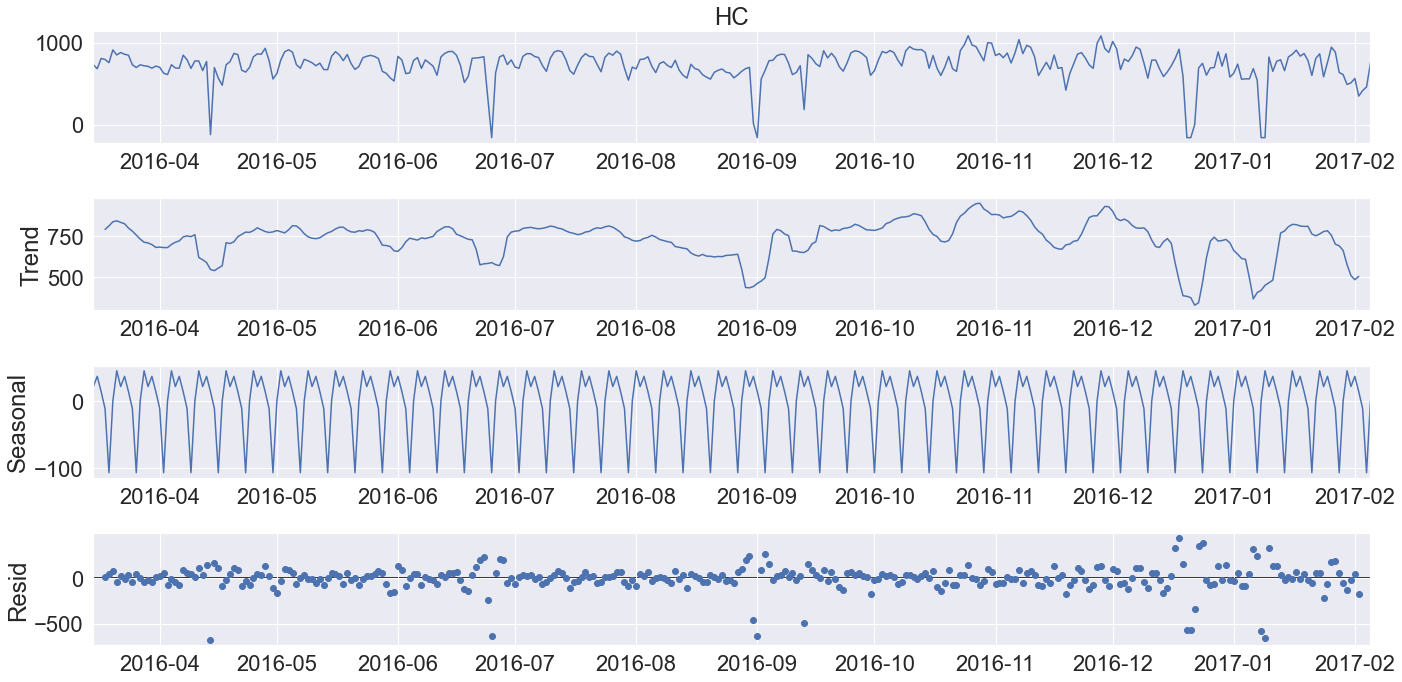

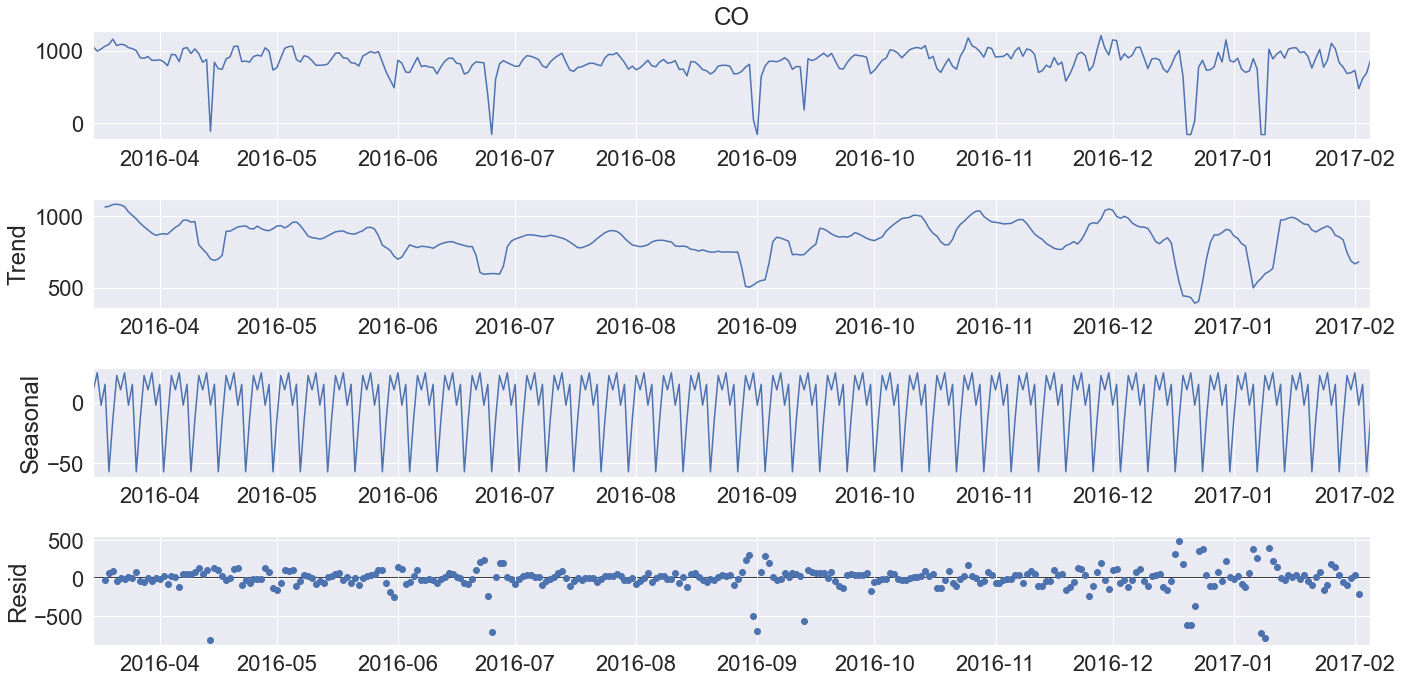

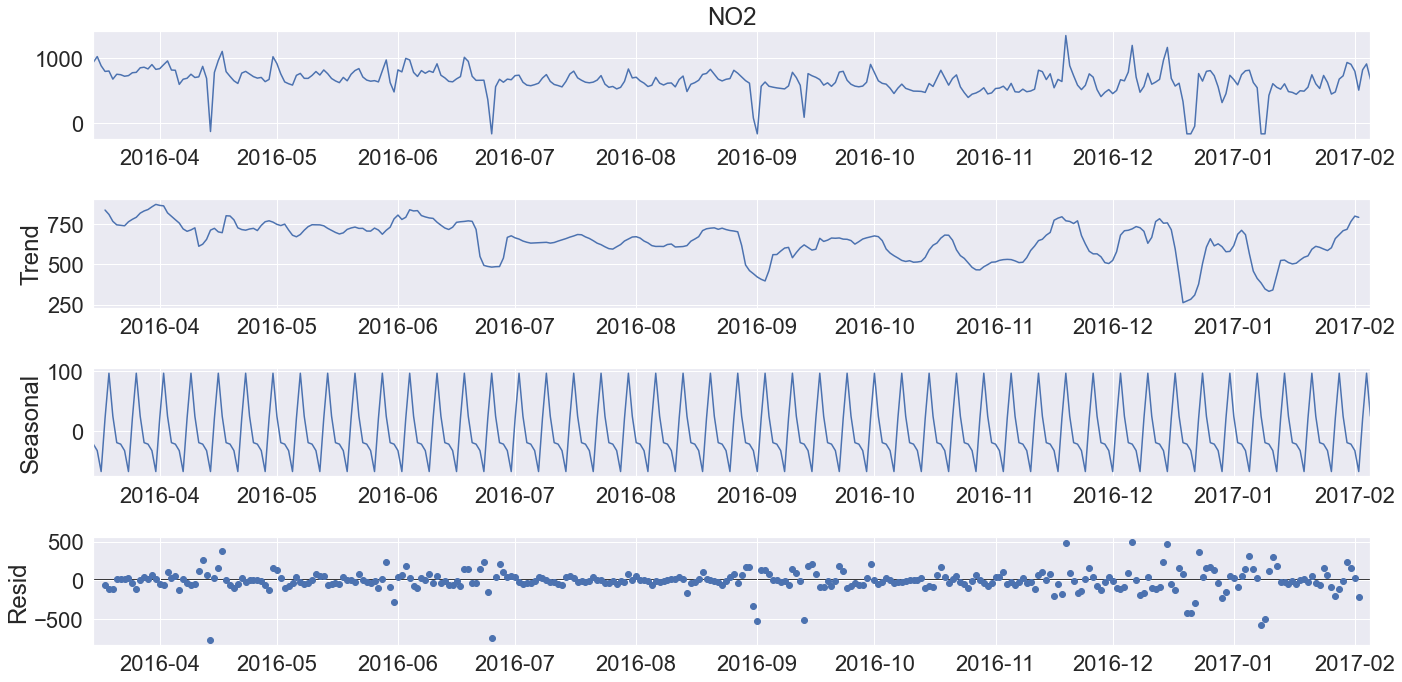

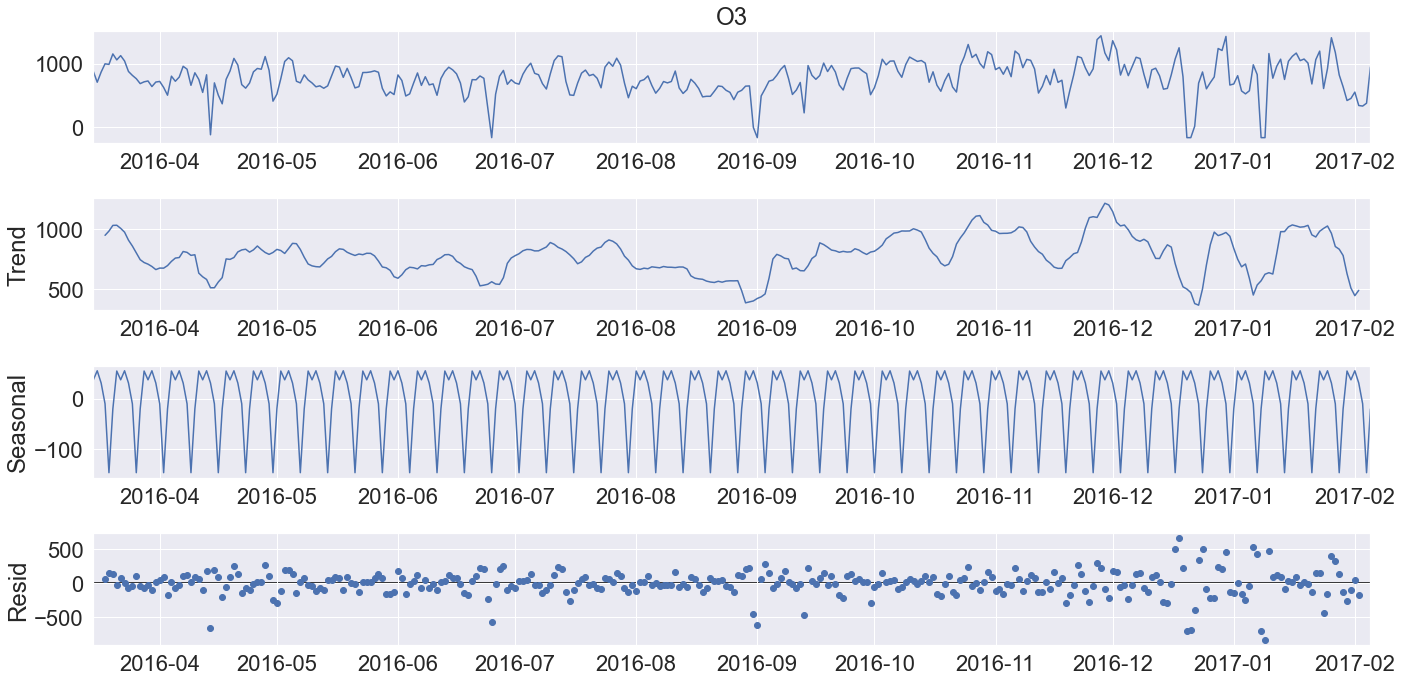

In [166]:


from statsmodels.tsa.seasonal import seasonal_decompose
gases = ['HC','CO','NO2','O3']

for gas in gases:
    result_add = seasonal_decompose(df[gas],model = 'add',period=7)
    result_add.plot()



### Augmented Dickey-Fuller Test for Stationarity

In [167]:
from statsmodels.tsa.stattools import adfuller

def stationary(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results = {
    col: stationary(df, col)
    for col in ['T','RH','CO','NO2','O3','HC']
}

display(adf_test_results)


{'T': 'Stationary',
 'RH': 'Stationary',
 'CO': 'Stationary',
 'NO2': 'Stationary',
 'O3': 'Stationary',
 'HC': 'Stationary'}

### AutoCorrelation Function (ACF) and Partial AutoCorrelation function (PACF)


#### Autocorrelation Function (ACF)
Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

We will be using the `plot_acf` function from the `statsmodels.graphics.tsaplots` library. (See statsmodels.tsa.stattools.acf)

The ACF plot can provide answers to the following questions:

- Is the observed time series white noise / random?
- Is an observation related to an adjacent observation, an observation twice-removed, and so on?
- Can the observed time series be modeled with an MA model? If yes, what is the order?

#### Partial Autocorrelation Function (PACF)
Additional correlation explained by each successive lagged term. The correlation between observations at two time spots given that we consider both observations are correlated to observations at other time spots.

The partial autocorrelation at lag k is the autocorrelation between  Xt  and  Xt−k  that is not accounted for by lags 1 through  k−1 .

We will be using the `plot_pacf` function from the `statsmodels.graphics.tsaplots` library with the parameter method = "ols" (regression of time series on lags of it and on constant). (See statsmodels.tsa.stattools.pacf)

Sidenote: The default parameter for `method` is `yw` (Yule-Walker with sample-size adjustment in denominator for acovf). However, this default value is causing some implausible autocorrelations higher than 1 on the sample data. Therefore, we change the method parameter to one that is not causing this issue. `ywmle` would also work fine as suggested in this StackExchange post.
The PACF plot can provide answers to the following questions:

- Can the observed time series be modeled with an AR model? If yes, what is the order?


[Credit](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook)

In [168]:
df

T         RH           CO          HC          NO2  \
Date                                                                     
2016-03-15  12.020833  54.883334  1053.200000  729.800000   933.800000   
2016-03-16   9.833333  64.069791   995.250000  681.441667  1021.750000   
2016-03-17  11.292708  51.107292  1025.250000  806.583333   881.375000   
2016-03-18  12.866319  51.530903  1064.444444  794.258333   794.527778   
2016-03-19  16.016667  48.843750  1088.741667  755.083333   800.883333   
...               ...        ...          ...         ...          ...   
2017-02-01   5.267708  39.614930   729.422222  562.650000   797.647222   
2017-02-02 -55.515972 -24.010417   474.291667  347.480556   508.180556   
2017-02-03 -14.272917  28.563542   615.700000  414.475000   819.733333   
2017-02-04   4.848611  37.832986   691.713889  458.947222   909.375000   
2017-02-05   7.273958  31.809375   867.600000  751.833333   673.741667   

                    O3  
Date                    
2016-03-15  876.833333  
2016-03-16  708.025000  
2016-03-17  867.375000  
2016-03-18  996.625000  
2016-03-19  987.341667  
...                ...  
2017-02-01  553.180556  
2017-02-02  343.500000  
2017-02-03  334.458333  
2017-02-04  379.513889  
2017-02-05  947.333333  

[328 rows x 6 columns]

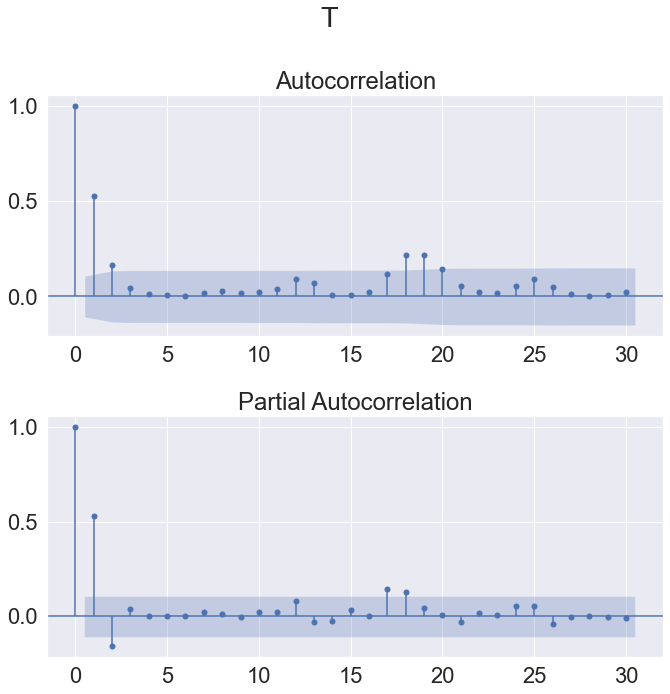

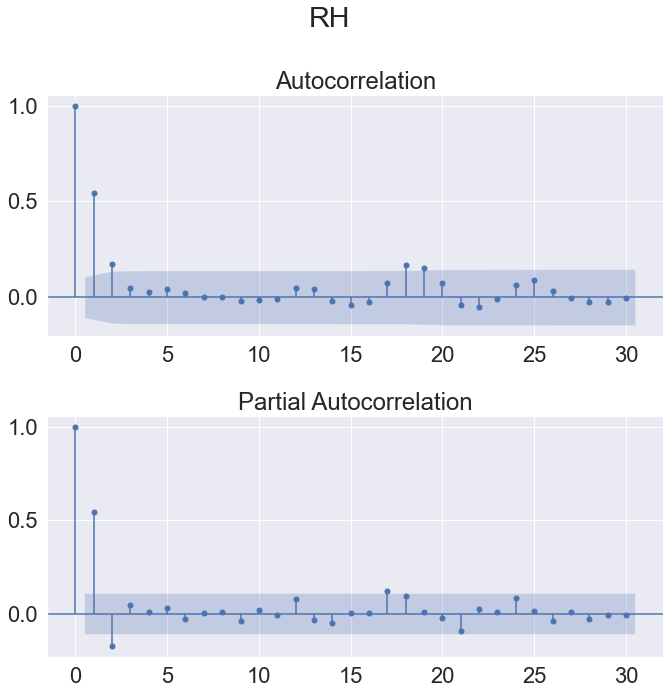

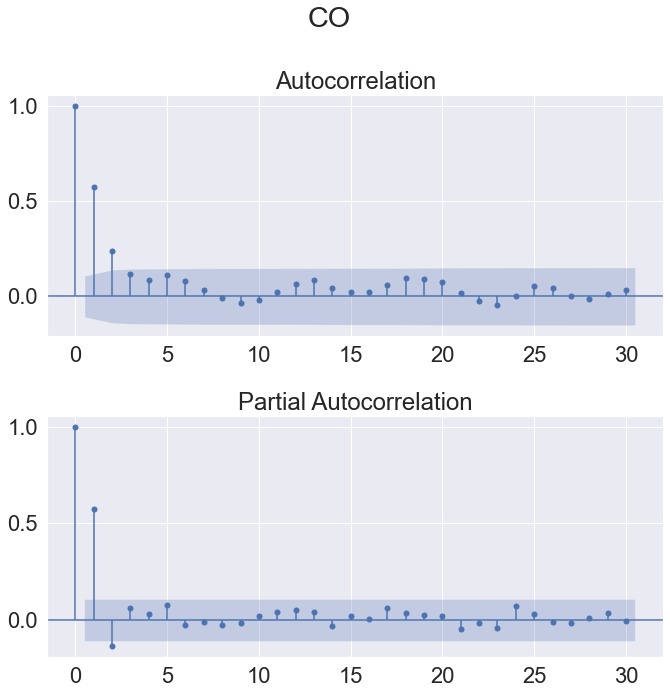

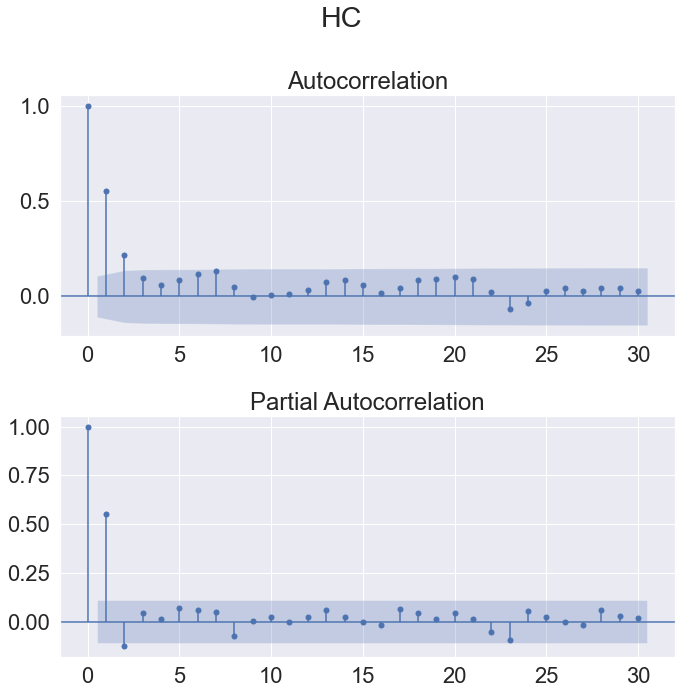

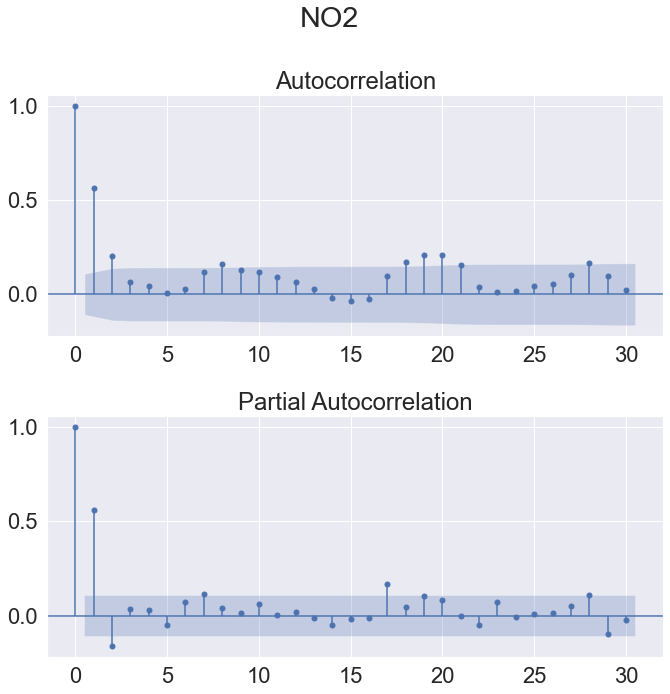

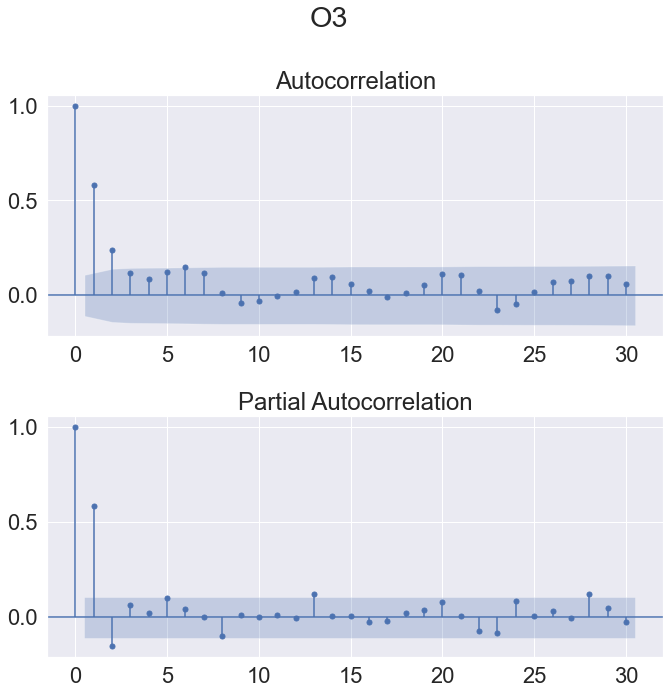

In [169]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


def plot_acf_graph(df):
    for col in df.columns:
        i=0
        f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
        plot_acf(df[col],lags=30, ax=ax[i])
        plot_pacf(df[col],lags=30, ax=ax[i+1], method='ols')
        plt.tight_layout()
        plt.suptitle(col)
        plt.show()

plot_acf_graph(df)



Analysis:

All autocorrelations are significantly non-zero. Therefore, the time series is non-random.


### Multivariate Anomaly Detection

To answer the question above, we need to understand the concepts of time-series data. Time-series data are strictly sequential and have autocorrelation, which means the observations in the data are dependant on their previous observations. If we use standard algorithms to find the anomalies in the time-series data we might get spurious predictions. So the time-series data must be treated specially. (Rajan, 2021)

Steps followed to detect anomalies in the time series data are,

1. Conduct an ADF test to check whether the data is stationary or not. If the data is not stationary convert the data into stationary data. (Rajan, 2021)
2. After converting the data into stationary data, fit a time-series model to model the relationship between the data. (Rajan, 2021)
3. Find the squared residual errors for each observation and find a threshold for those squared errors.
Any observation’s squared error exceeding the threshold can be marked as an anomaly.
The reason behind using this approach, (Rajan, 2021)

As stated earlier, the time-series data are strictly sequential and contain autocorrelation. By using the above approach the model would find the general behaviour of the data. The normal data’s prediction error would be much smaller when compared to anomalous data’s prediction error. (Rajan, 2021)

Since our data is stationary, we will proceed straight to the VAR model to handle multivariate anomaly detection

In [170]:
from statsmodels.tsa.api import VAR
anomaly = dfs.copy()
anomaly  = anomaly.iloc[: , :-2]
anomaly = anomaly.set_index(['Date','Gas'])

max_lag = 20
var_model = VAR(anomaly)
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(anomaly)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

threshold = np.mean(squared_errors) + 10 * np.std(squared_errors)
data = anomaly.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
print(data['Predictions'].value_counts())
anomaly = data[data['Predictions']!=1]
anomaly = anomaly.reset_index()
anomaly

20
0    1226
1      66
Name: Predictions, dtype: int64


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Date Gas          T         RH        Value  Predictions
0      4/4/2016  CO  15.511458  34.455208   949.500000            0
1      5/4/2016  CO  13.579167  55.035764   944.769444            0
2      6/4/2016  CO -11.426042  19.742014   850.991667            0
3      7/4/2016  CO  17.944792  49.104166  1031.033333            0
4      8/4/2016  CO  19.129514  45.696181  1045.708333            0
...         ...  ..        ...        ...          ...          ...
1221  31/1/2017  O3   4.213542  49.477083   454.158333            0
1222   1/2/2017  O3   5.267708  39.614930   553.180556            0
1223   3/2/2017  O3 -14.272917  28.563542   334.458333            0
1224   4/2/2017  O3   4.848611  37.832986   379.513889            0
1225   5/2/2017  O3   7.273958  31.809375   947.333333            0

[1226 rows x 6 columns]

### Granger's Causality Test

The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.

This can be used to determine whether the Temperature and RH time series are useful for forecasting the different gases.

In [171]:
from statsmodels.tsa.stattools import grangercausalitytests


maxlag=7
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

T_x    RH_x    CO_x    HC_x   NO2_x    O3_x
T_y    1.0000  0.1257  0.6593  0.7240  0.2505  0.5953
RH_y   0.0380  1.0000  0.2407  0.3673  0.0305  0.1439
CO_y   0.0350  0.0250  1.0000  0.1240  0.2394  0.2242
HC_y   0.0141  0.0046  0.0003  1.0000  0.0659  0.3977
NO2_y  0.1702  0.3143  0.4698  0.1523  1.0000  0.0833
O3_y   0.0140  0.0285  0.0049  0.3991  0.0324  1.0000

Analysis:

We can observe that Temperature Granger cause:
1. Relative Humidity
2. CO Amount
3. HC Amount
4. O3 Amount

We can also observe Relative Humidity Granger Causes:
1. CO Amount
2. HC Amount
3. O3 Amount

Interesting observations are that Temperature causes Relative Humidity but the converse is not true.

This may be due to the fact that the dataset given is based on an Italian City.

Since Italy is surrounded by a body of water, the shortwave radiation from the Sun may hit the ocean water and cause the water to evaporate and increase the content of water vapour in the air. And when the temperature increases, the warmer air needs more moisture to reach its saturation point, while colder air has a much lower saturation threshold—it's relative to the current temperature. Hence, temperature causes relative humidity.

We can observe a common occurrence in that NO2 is not present in either the causation of temperature or relative humidity.

This is due to the fact that Nitrogen Dioxide (NO2) is actually produced by the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment. (US EPA,OAR, 2016)

However, according to a study in 2019, Chinese scientists conducted a study on the effect of temperature and relative humidity on NO2 Pollution (Negative levels of NO2 present in the air). The findings suggested that season and temperature strongly modified the adverse effects of NO2: in the cold season and on days with low temperatures, the adverse effect of NO2 on cardiovascular mortality was significantly enhanced. (Duan et al., 2019)

Hence, we will depend on the findings of the model to interpret this relationship.


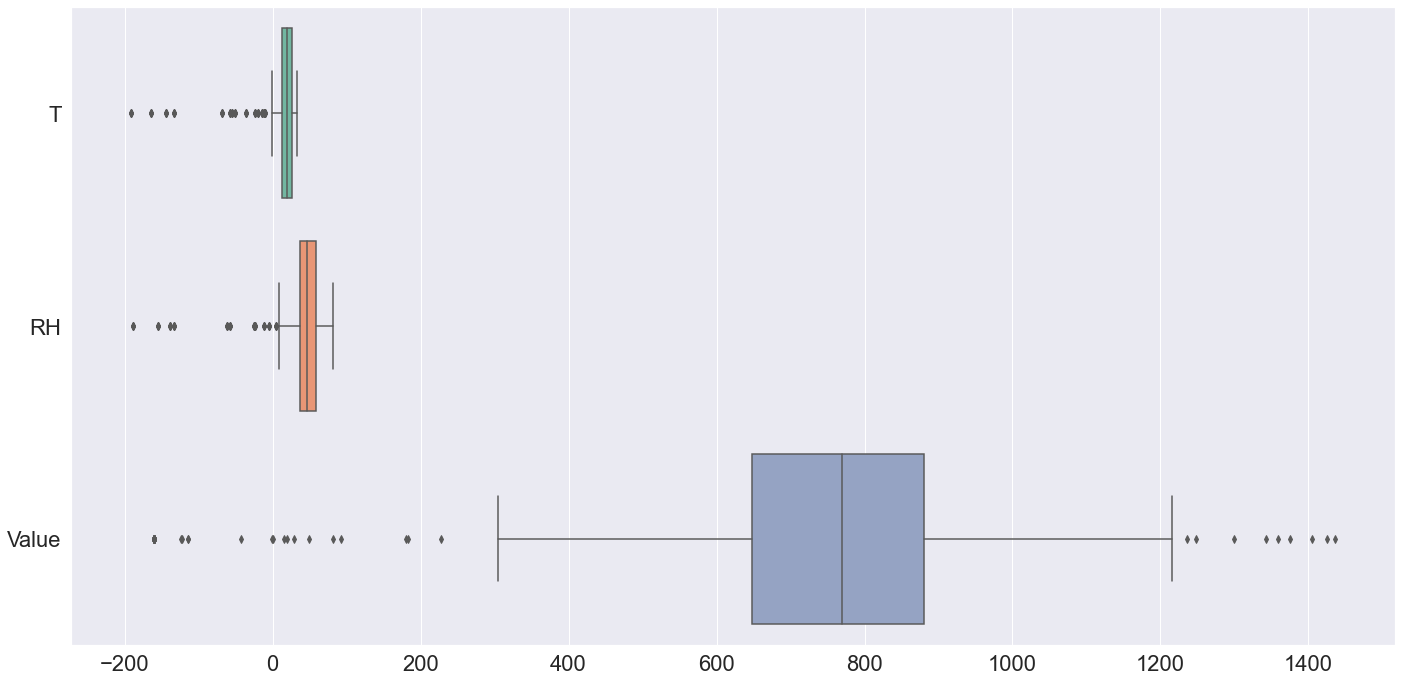

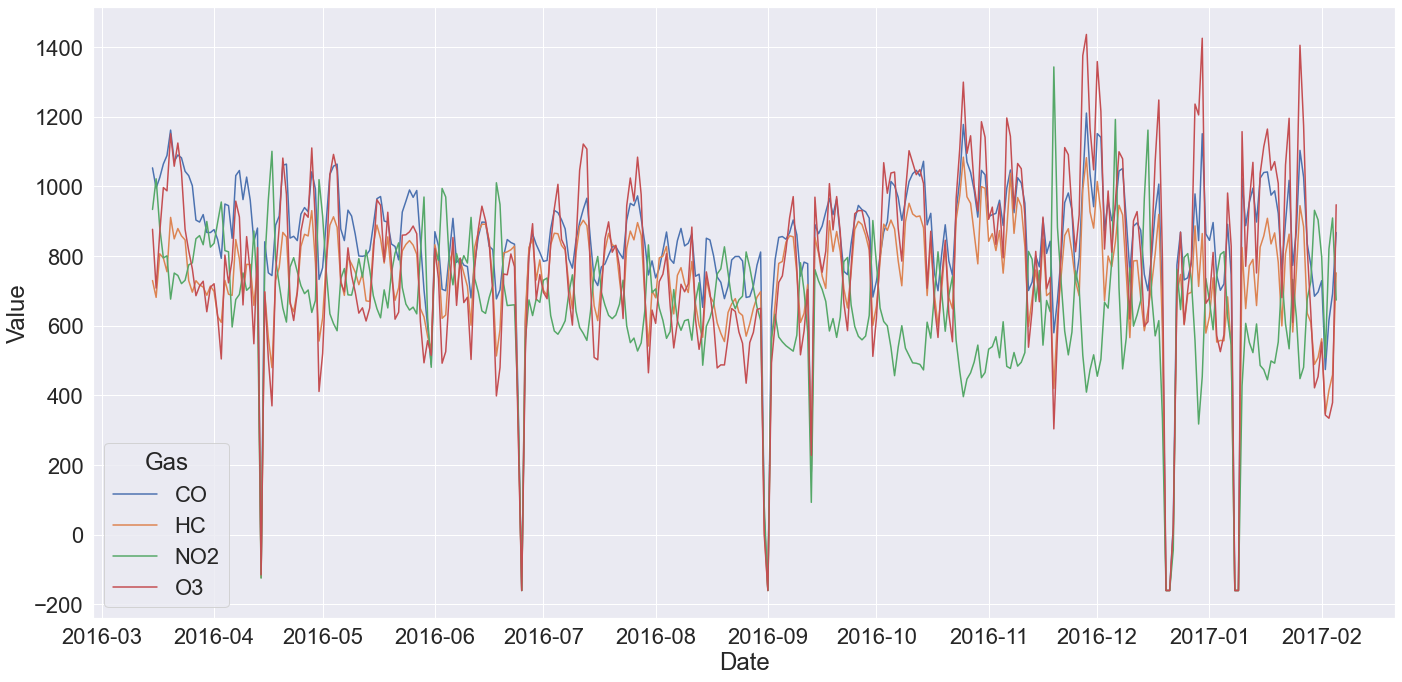

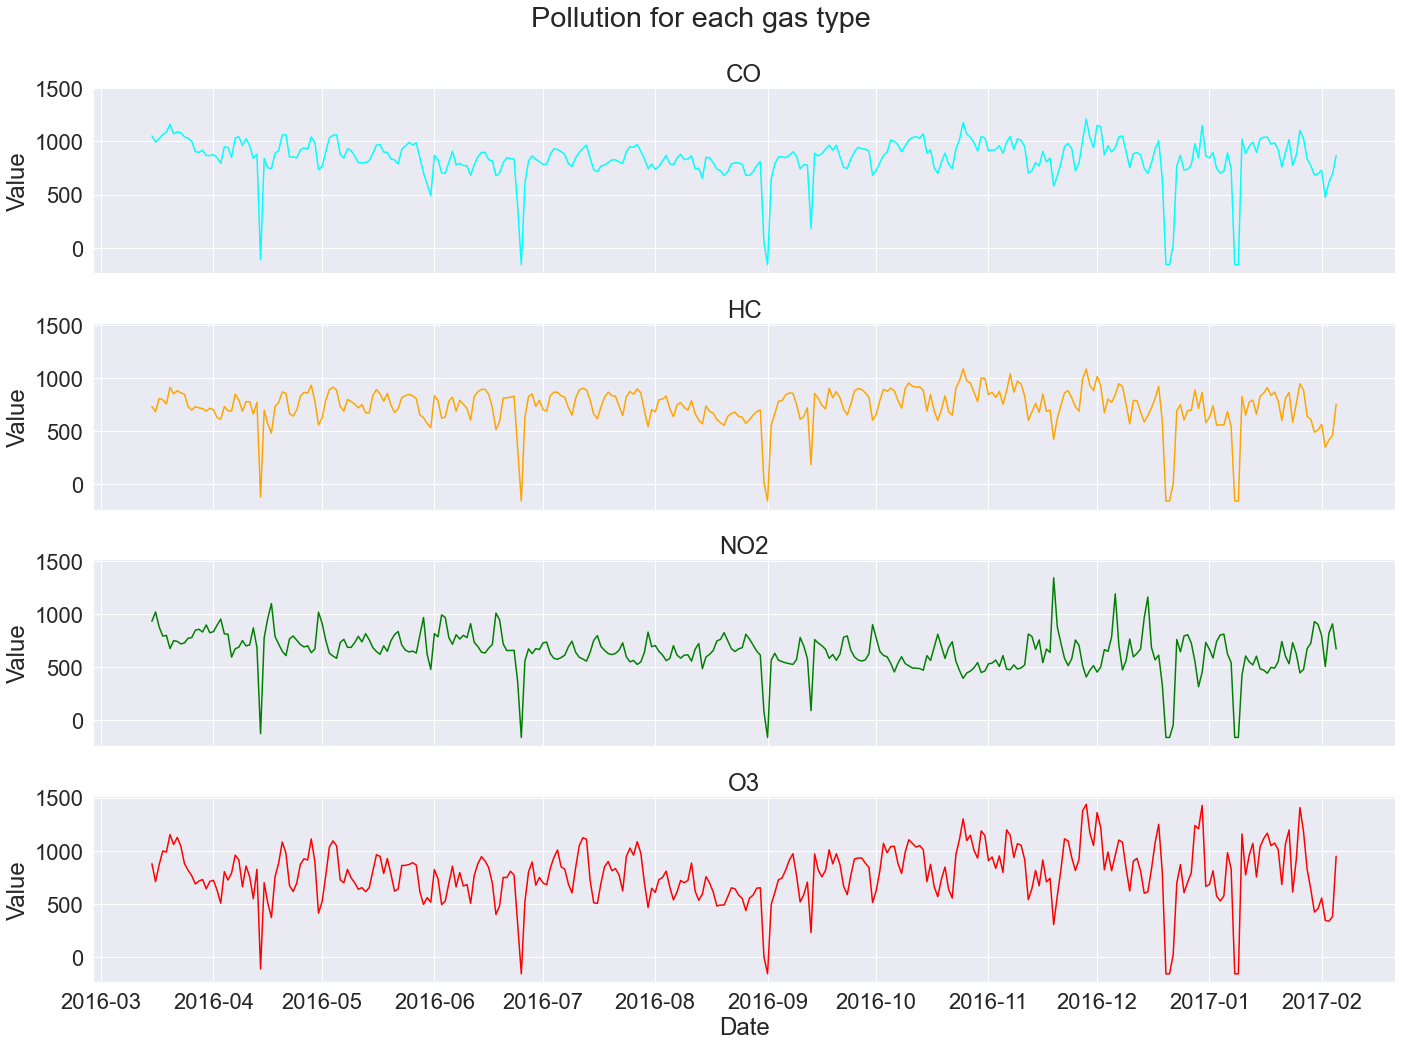

In [172]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

df = df_plot.copy()

ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

ax = sns.lineplot(data=df, x="Date", y="Value", hue="Gas")
# ax.xaxis.set_visible(False)

fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharey=True,sharex=True)
fig.suptitle('Pollution for each gas type')


# CO
sns.lineplot(ax=axes[0],data=gas_co, x="Date", y="Value",color='aqua')
axes[0].set_title('CO')
# axes[0].xaxis.set_visible(False)

# HC
sns.lineplot(ax=axes[1],data=gas_HC, x="Date", y="Value",color='orange')
axes[1].set_title('HC')
# axes[1].xaxis.set_visible(False)

# NO2
sns.lineplot(ax=axes[2],data=gas_NO2, x="Date", y="Value",color='green')
axes[2].set_title('NO2')
# axes[2].xaxis.set_visible(False)

# O3
sns.lineplot(ax=axes[3],data=gas_O3, x="Date", y="Value",color='red')
axes[3].set_title('O3')
# axes[3].xaxis.set_visible(False)

plt.show()



We can observe from the boxplot that the number of outlier values for Temperature and Humidity are only to the left of their respective plots, whereas the number of outlier values for the value of the gases exist on both ends of the plots. This means that the outlier values are below the minimum value allowed by the whisker.

This minimum value is calculated by taking: $Q1-1.5*IQR$

This may be due to the fact that these extremely low values are actually substitutes for missing values, and hence, we will get rid of them.

Additionally, when we analyse the shapes of the graphs for the value of each gas, we can see that the shapes of `CO` and `HC` are similar to each other, whereas the shapes of `NO2` and `O3` are different. This may be due to the different factors that are responsible for the production of these gases. We will dive deeper into this later.

### Handling Missing Rows

We remove the rows of Relative Humidity if RH is < 0, and since the dataset is sourced from an Italian city, we know that the average lowest temperature in an Italian city is -30 degrees celcius, we remove the rows of temperature if it is < 30

CO     328
HC     328
NO2    328
O3     328
Name: Gas, dtype: int64
327 days, 0:00:00
Start Date :  2016-03-15
End Date :  2017-02-05
CO     328
HC     328
NO2    328
O3     328
Name: Gas, dtype: int64


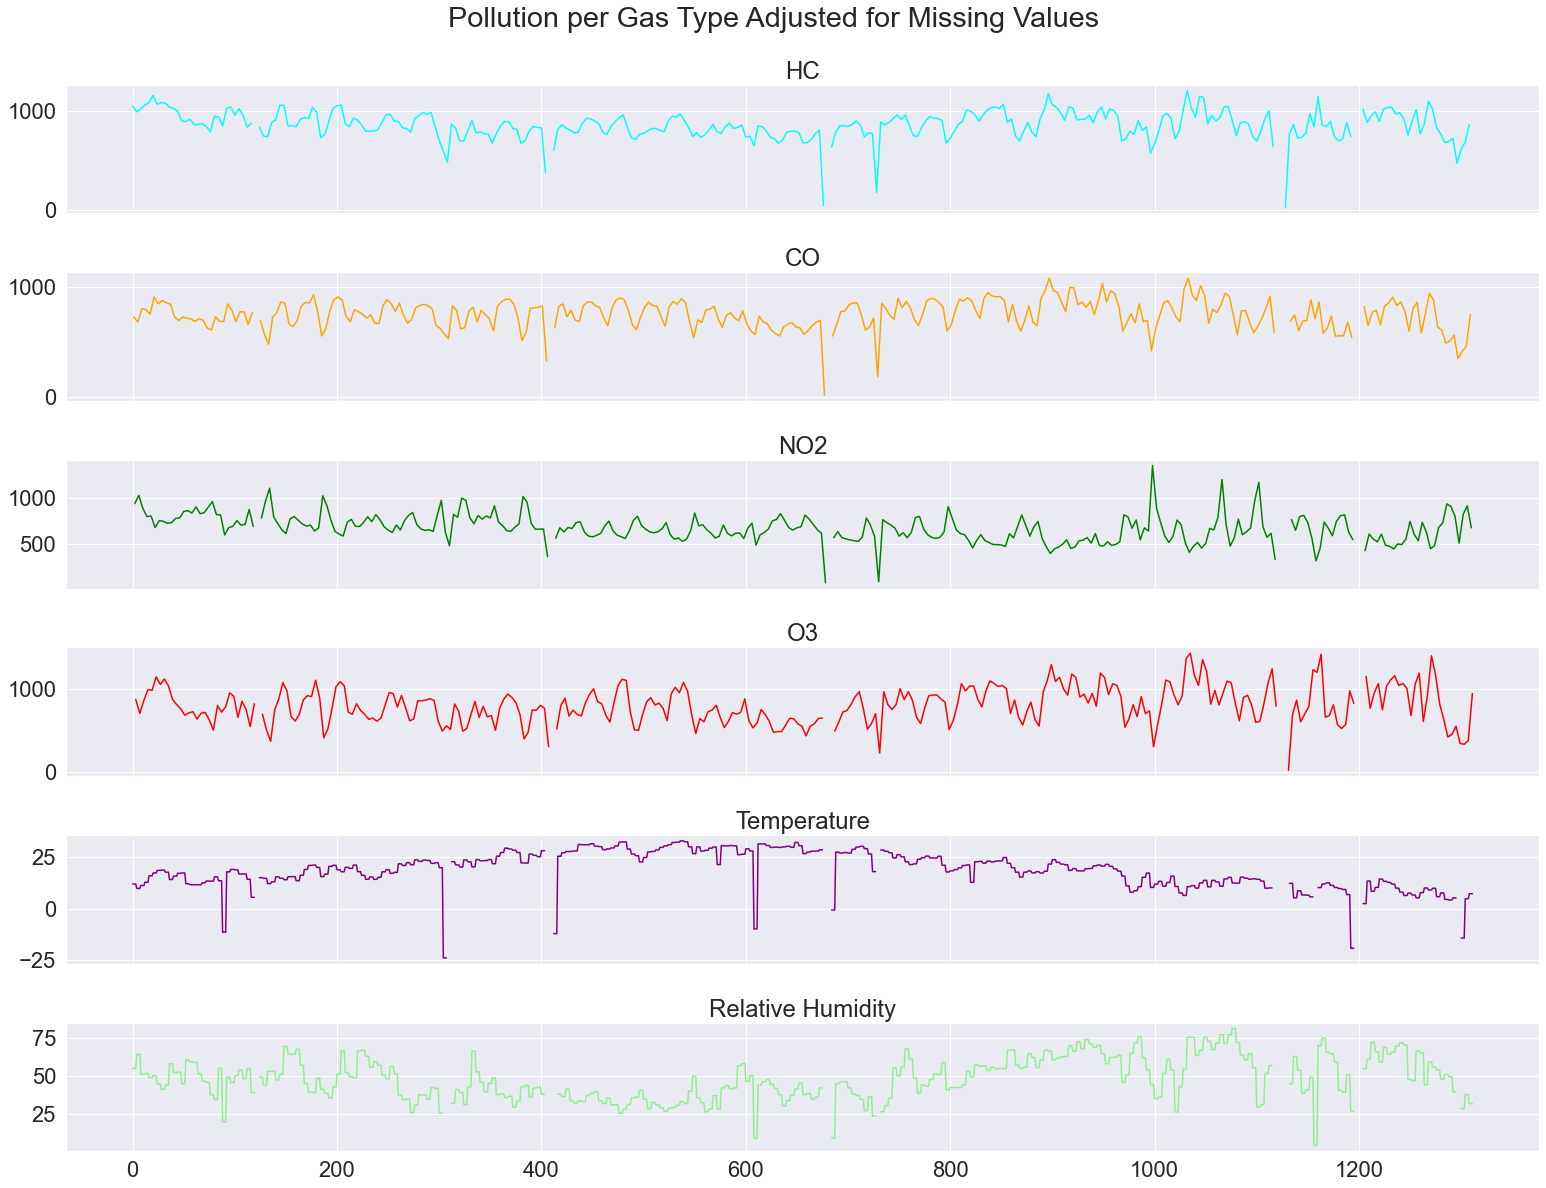

In [173]:
# fill missing & invalid rows with na


print(df['Gas'].value_counts())
print(df['Date'].max()-df['Date'].min())

def add_na(dataframe):
    global df
    idx = pd.date_range(dataframe['Date'].min(), dataframe['Date'].max(),freq='D').date
    print('Start Date : ',dataframe['Date'].min())
    print('End Date : ',dataframe['Date'].max())
    gases = ['HC','CO','NO2','O3']
    for dates in idx:
        missing = set(gases).difference(dataframe.loc[dataframe['Date'] == dates]['Gas'])
        for i in missing:
            df = df.append({'Date':dates, 'Gas':i, 'T':np.nan,'RH':np.nan,'Value':np.nan}, ignore_index=True)
    df['RH'] = df['RH'].apply(lambda x: x if x > 0 else np.nan)
    df['T'] = df['T'].apply(lambda x: x if x > -30 else np.nan)
    df['Value'] = df['Value'].apply(lambda x: x if x > 0 else np.nan)


add_na(df)

# cleaning
df = df.reset_index()
df = df.drop(columns='index',axis=1)
df = df.sort_values(by=['Date','Gas'])
df = df.reset_index()
df = df.drop(columns='index',axis=1)
print(df['Gas'].value_counts())
# reassign individual dataframe with new values
gas_co = df.loc[df['Gas'] == 'CO']
gas_HC = df.loc[df['Gas'] == 'HC']
gas_NO2 = df.loc[df['Gas'] == 'NO2']
gas_O3 = df.loc[df['Gas'] == 'O3']
temp = pd.DataFrame(df[['Date','T']],columns=['Date','T'])
temp = temp.rename(columns={'T':'Value'})
rh = pd.DataFrame(df[['Date','RH']],columns=['Date','RH'])
rh = rh.rename(columns={'RH':'Value'})

def plot_adjusted():
    dataframes = [gas_co,gas_HC,gas_NO2,gas_O3,temp,rh]
    gases = ['HC','CO','NO2','O3','Temperature','Relative Humidity']
    palette = ['aqua','orange','green','red','purple','lightgreen']
    i=0
    fig, axes = plt.subplots(6, 1, figsize=(22, 17),sharex=True)
    fig.suptitle('Pollution per Gas Type Adjusted for Missing Values')
    for color,dataframe,gas in zip(palette,dataframes,gases):
        dataframe['Value'].plot(ax=axes[i],color=color).set_title(gas)
        i+=1


plot_adjusted()


#### Data Imputation

1. Mean imputation
2. Median imputation
3. Last Observation Carried Forward(LOCF)
4. Next Observation Carried Backward(NOCB)
5. Linear interpolation (rolling window)
6. Spline interpolation (polynomial interpolation)

https://www.section.io/engineering-education/missing-values-in-time-series/

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


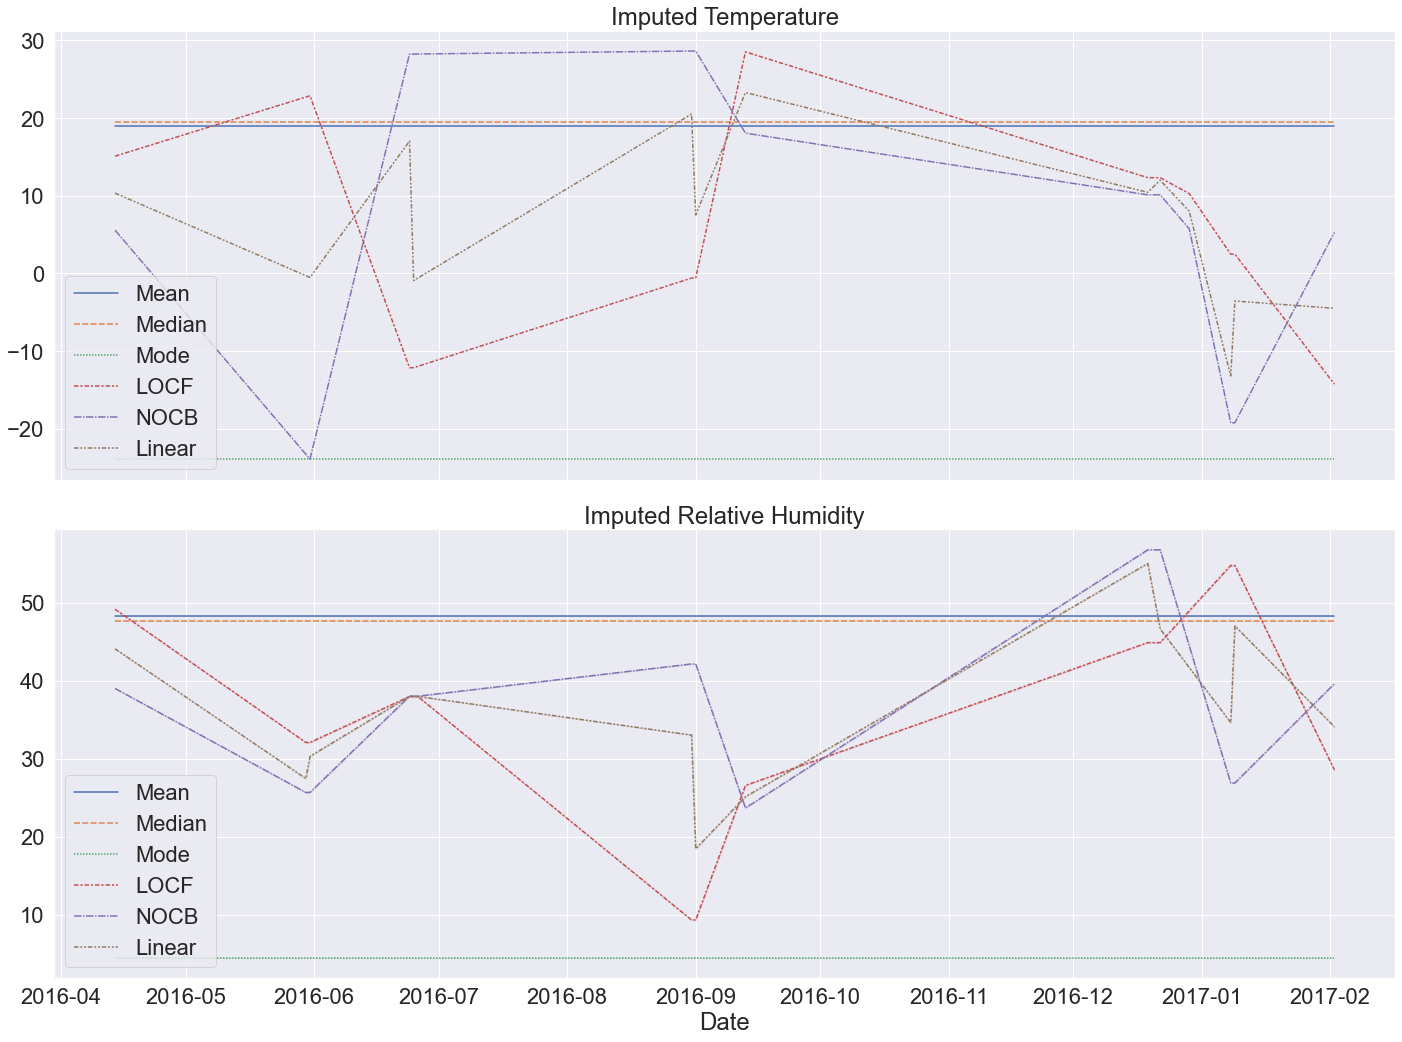

In [174]:
df =df.sort_values(['Date', 'Gas'], ascending=[True, False])

df
# mean imputation
mean = df.copy()
mean = mean.fillna({'T':mean['T'].mean(), 'RH':mean['RH'].mean(),'Value':mean['Value'].mean()})


# median imputation
median = df.copy()
median = median.fillna({'T':median['T'].median(), 'RH':median['RH'].median(),'Value':median['Value'].median()})


# mode imputation
mode = df.copy()
mode = mode.fillna({'T':mode['T'].mode().iloc[0], 'RH':mode['RH'].mode().iloc[0],'Value':mode['Value'].mode().iloc[0]})


# Last Observation Carried Forward (LOCF) imputation
locf = df.copy()
locf[['T','RH','Value']] = locf[['T','RH','Value']].fillna(method ='bfill')


# Next Observation Carried Backward (NOCB) imputation
nocb = df.copy()
nocb[['T','RH','Value']] = nocb[['T','RH','Value']].fillna(method ='ffill')


# Linear Interpolation
linear = df.copy()
linear[['T','RH','Value']] = linear[['T','RH','Value']].interpolate(method='linear')


def mean_finder(df):
    dates = pd.unique(df['Date'])
    for date in dates:
        value = np.mean(df[df['Date']==date]['Linear'])
        df['Linear'].loc[df['Date'] == date] = value
    return df

# temperature imputation
imputed_temp = mean.loc[df[df['T'].isnull()]['T'].index][['Date','T']]
imputed_temp = pd.concat([imputed_temp, median.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, mode.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, locf.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, nocb.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, linear.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp.columns = ['Date', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']

mean_finder(imputed_temp)
imputed_temp = imputed_temp.drop_duplicates()

# rh imputation
imputed_rh = mean.loc[df[df['RH'].isnull()]['RH'].index][['Date','RH']]
imputed_rh = pd.concat([imputed_rh, median.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, mode.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, locf.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, nocb.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, linear.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh.columns = ['Date', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']
imputed_rh = imputed_rh.drop_duplicates()

mean_finder(imputed_rh)

# imputed pollution value
imputed_value = mean.loc[df[df['Value'].isnull()]['Value'].index][['Date','Gas','Value']]
imputed_value = pd.concat([imputed_value, median.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, mode.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, locf.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, nocb.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, linear.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value.columns = ['Date','Gas', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']

imputed_rh.reset_index(inplace=True)
imputed_temp.reset_index(inplace=True)


imputed_rh = imputed_rh.drop(columns='index',axis=1)
imputed_rh = imputed_rh.set_index('Date')
imputed_temp = imputed_temp.drop(columns='index',axis=1)
imputed_temp = imputed_temp.set_index('Date')


imputed_value



fig, axes = plt.subplots(2, 1, figsize=(20, 15),sharex=True)
ax0 = sns.lineplot(ax=axes[0],data=imputed_temp)
ax0.set(xlabel=None)
ax0.set_title('Imputed Temperature')
ax1 = sns.lineplot(ax=axes[1],data=imputed_rh)
ax1.set_title('Imputed Relative Humidity')


plt.show()

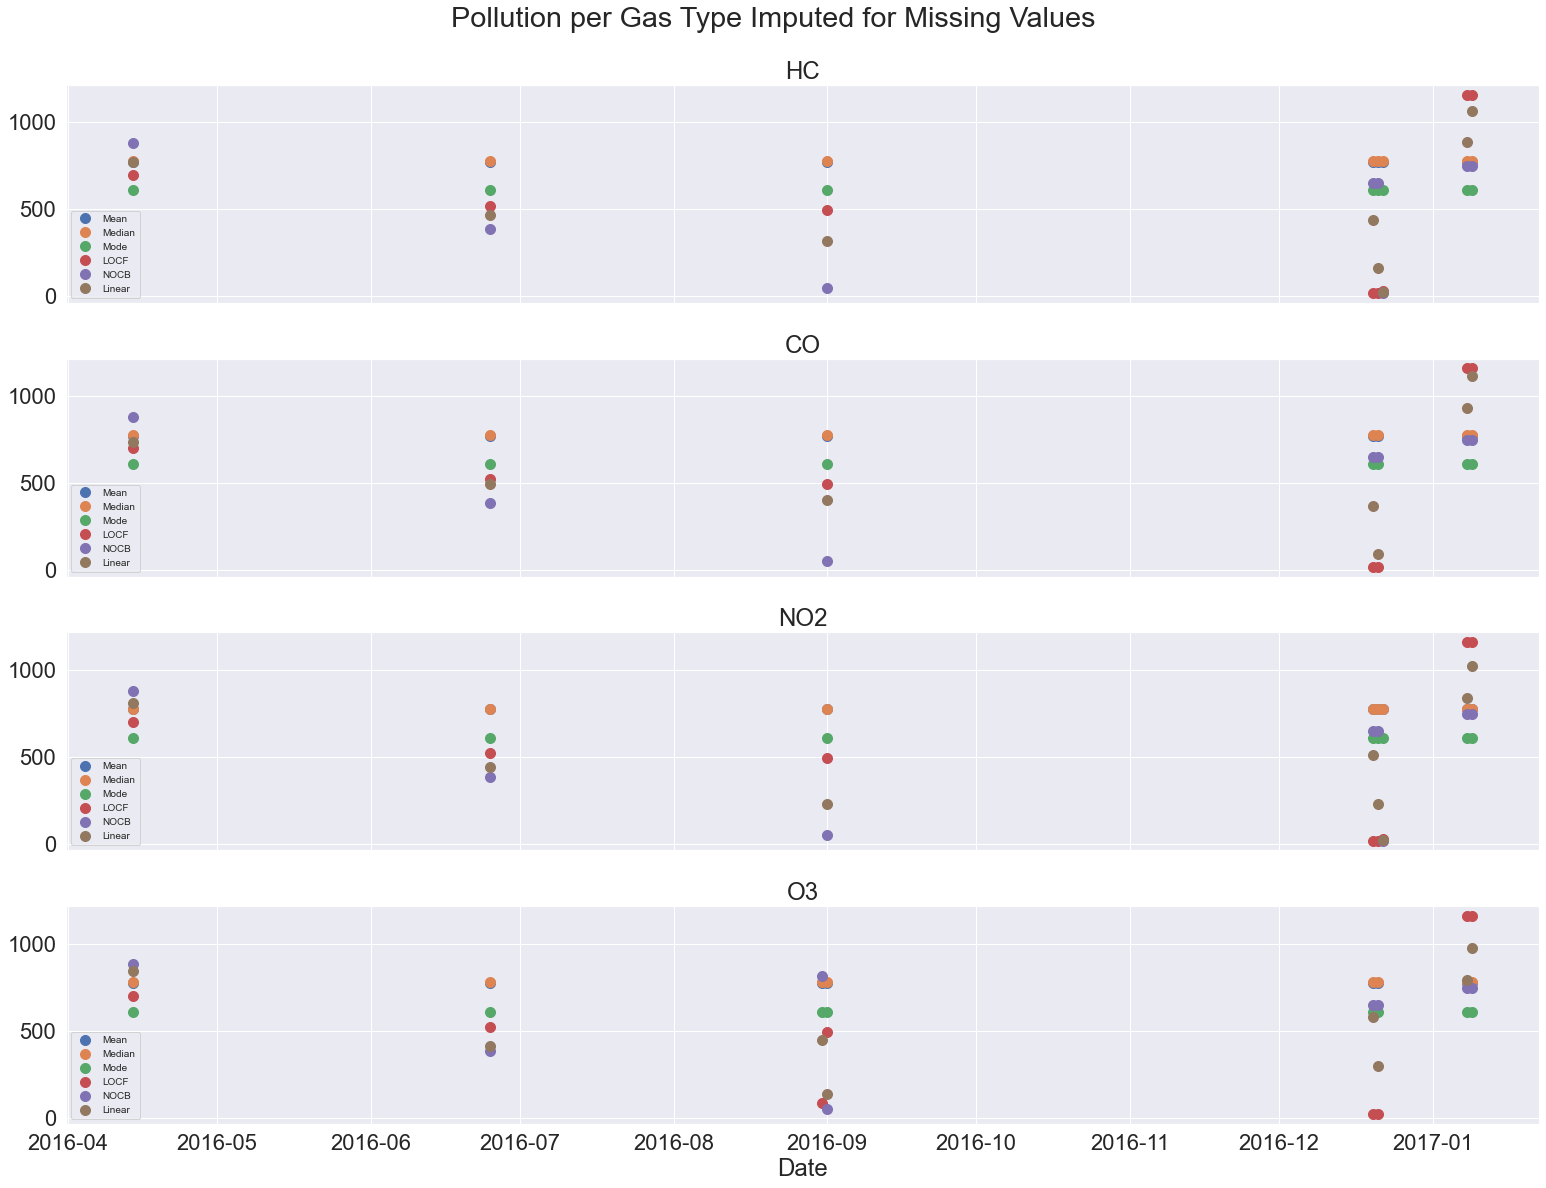

In [175]:

def plot_imputed(df):
    df = df.set_index('Date')
    methods = ['Mean','Median','Mode','LOCF','NOCB','Linear']
    gases = ['HC','CO','NO2','O3']
    i=0
    fig, axes = plt.subplots(4, 1, figsize=(22, 17),sharex=True)
    fig.suptitle('Pollution per Gas Type Imputed for Missing Values')
    for gas in gases:

        df[df['Gas']==gas].plot(style='o',ax=axes[i],title=gas,ms=10).legend(loc='lower left',fontsize=10)

        i +=1

plot_imputed(imputed_value)

## Splitting Data
df = dfs.copy()
# train set
df  = df.iloc[: , :-2]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.pivot(index='Date', columns='Gas', values=['T','RH','Value'])
df.columns = df.columns.to_series().str.join('_')
df = df.drop(columns=['T_CO','T_HC','T_O3','RH_CO','RH_HC','RH_O3'])
df = df.rename(columns={'T_NO2':'T','RH_NO2':'RH','Value_CO':'CO','Value_HC':'HC','Value_NO2':'NO2','Value_O3':'O3'})



***



## Model Exploration

We will explore the baseline statistical models used with time-series data along with multivariate time-series models as we have more than 2 columns (Time, Target Variable)

Model exploration will be able to give us a good representation and comparison of the performance of each model.

The models that we will be exploring will be:
1. Exponential Smoothing
2. Vector Autoregressions (VAR) note (Forecast Error Variance Decomposition (FEVD))
3. Vector Moving Average (VMA)
4. Vector Auto-Regressive Integrated Moving Average (VARIMA)
5. Vector Error Correction Model (VECM)
6. Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
7. Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)

### Data Preparation
We will split the Train Data into Train and Evaluate test sets.

The Train Set will be used to train the model while the evaluation set will act as a test set to evaluate the train set. However, we only want to use the test set at the end to make sure that the model does not interact with unseen data during training.

In [176]:

train_set = df[:-63]
eval_set = df[-63:]
endog = gases
exog = ['T','RH']


def metrics(pred,true):
    def adjust(val, length= 6): return str(val).ljust(length)
    def forecast_accuracy(forecast, actual):
        rmse = np.mean((forecast - actual)**2)**.5  # RMSE
        return {'rmse':rmse}

    print('Forecast Accuracy of: HC')
    accuracy_prod = forecast_accuracy(pred['HC'].values, true['HC'])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))

    print('\nForecast Accuracy of: CO')
    accuracy_prod = forecast_accuracy(pred['CO'].values, true['CO'])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))

    print('\nForecast Accuracy of: NO2')
    accuracy_prod = forecast_accuracy(pred['NO2'].values, true['NO2'])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))

    print('\nForecast Accuracy of: O3')
    accuracy_prod = forecast_accuracy(pred['O3'].values, true['O3'])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))



In [177]:
print(len(train_set.index))

265


### Holt-Winter Exponential Smoothing Model

#### Fitting & Forecasting

In [178]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.stattools import durbin_watson

results_dict = {}
durbin = {}
pred_df = pd.DataFrame(columns=gases,index=eval_set.index)

for gas in gases:
    model = ExponentialSmoothing(train_set[gas],trend='add',seasonal='add')
    fit_model = model.fit()
    durbin[gas]=(durbin_watson(fit_model.resid))
    pred_df[gas]=fit_model.forecast(63)



C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was prov

#### Durbin-Watson Test Statistic

"The Durbin-Watson statistic lies in the range 0-4. A value of 2 or nearly 2 indicates that there is no first-order autocorrelation. An acceptable range is 1.50 - 2.50."

[Source](https://help.sap.com/saphelp_SCM700_ehp02/helpdata/en/e8/3cc95360267614e10000000a174cb4/content.htm?no_cache=true)

In [179]:
durbin

{'HC': 1.5329642297043644,
 'CO': 1.737637585094983,
 'NO2': 1.3968102086874106,
 'O3': 1.7037322066431875}

#### Model Evaluation


In [180]:
metrics(pred_df,eval_set)
results_dict['Exponential Smoothing']=[rmse(pred_df[x],eval_set[x]) for x in pred_df if x!="T" or x!="RH"]

Forecast Accuracy of: HC
rmse   :  354.2163

Forecast Accuracy of: CO
rmse   :  413.0959

Forecast Accuracy of: NO2
rmse   :  288.8401

Forecast Accuracy of: O3
rmse   :  504.4661


### Vector Autoregressions (VAR)
Note: (Forecast Error Variance Decomposition (FEVD))

#### Fitting

In [181]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar.var_model import VAR


# analyse lag results
model = VAR(endog=train_set[endog],exog=train_set[exog])
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

model = VAR(endog=train_set[endog],exog=train_set[exog])
fit_model = model.fit(maxlags=8,ic='aic')
fit_model.summary()
lag_order = fit_model.k_ar
print(lag_order)

Lag Order = 1
AIC :  32.874968763473966
BIC :  33.25423609259555
FPE :  189425797773533.6
HQIC:  33.02736990950468 

Lag Order = 2
AIC :  32.80311615268009
BIC :  33.4007388804969
FPE :  176318206100759.12
HQIC:  33.04328645517483 

Lag Order = 3
AIC :  32.74123723893625
BIC :  33.55841536956856
FPE :  165789271655988.94
HQIC:  33.069678976280514 

Lag Order = 4
AIC :  32.73163128087927
BIC :  33.76957592055944
FPE :  164291484392407.0
HQIC:  33.14885136412602 

Lag Order = 5
AIC :  32.722685540806744
BIC :  33.98261904101224
FPE :  162962341963838.34
HQIC:  33.229195572002354 

Lag Order = 6
AIC :  32.549215035976
BIC :  34.03237113892407
FPE :  137171894357456.19
HQIC:  33.14553136741014 

Lag Order = 7
AIC :  32.45460551484619
BIC :  34.16222950139767
FPE :  124992129505532.12
HQIC:  33.14124930924309 

Lag Order = 8
AIC :  32.2995858420005
BIC :  34.232934682021245
FPE :  107272920317736.52
HQIC:  33.07708313366945 

Lag Order = 9
AIC :  32.35464379175314
BIC :  34.514986296982876


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


#### Durbin-Watson Test Statistic

"The Durbin-Watson statistic lies in the range 0-4. A value of 2 or nearly 2 indicates that there is no first-order autocorrelation. An acceptable range is 1.50 - 2.50."

[Source](https://help.sap.com/saphelp_SCM700_ehp02/helpdata/en/e8/3cc95360267614e10000000a174cb4/content.htm?no_cache=true)

In [182]:
durbin_watson(fit_model.resid)

array([1.9091695 , 1.69924387, 1.85030773, 1.99488874])

#### Forecasting

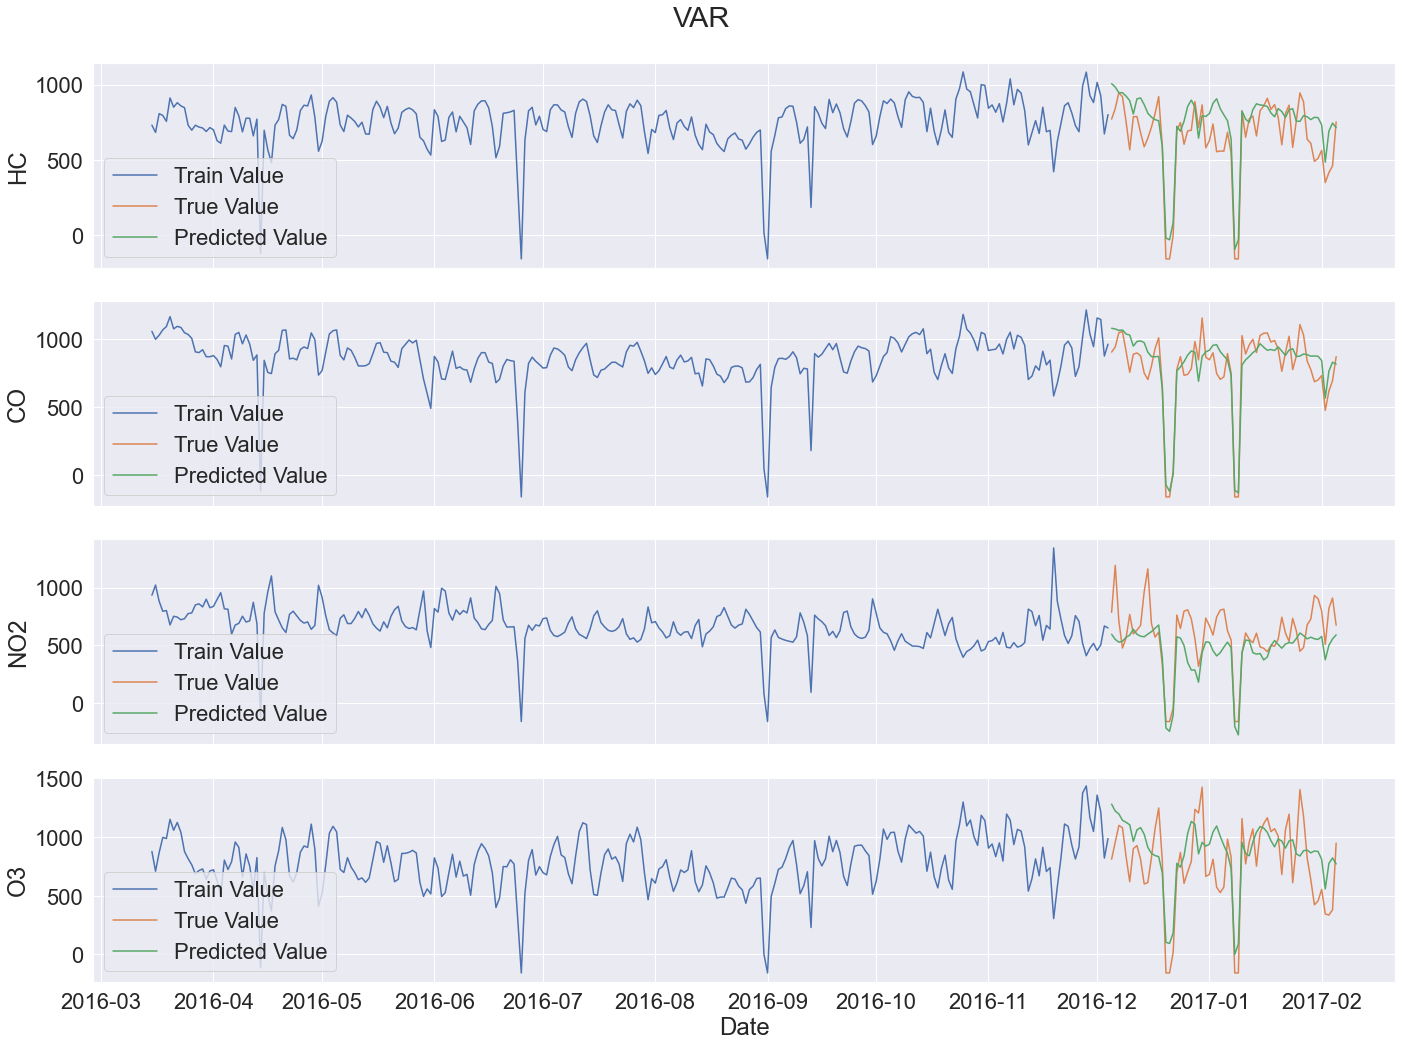

In [183]:
# Input data for forecasting
forecast_input = train_set.values[-lag_order:]
pred = pd.DataFrame(fit_model.forecast(y=train_set[gases].shift(lag_order).values, steps=len(eval_set),exog_future=eval_set[exog]),columns=gases,index=eval_set.index)

fig, axes = plt.subplots(4, 1, figsize=(20, 15),sharex=True)
for i in range(len(endog)):
    sns.lineplot(ax=axes[i],data=train_set[endog[i]],label='Train Value')
    sns.lineplot(ax=axes[i],data=eval_set[endog[i]],label='True Value')
    sns.lineplot(ax=axes[i],data=pred[endog[i]],label='Predicted Value')

plt.suptitle('VAR')
plt.show()

#### Model Evaluation

In [184]:
metrics(pred,eval_set)
results_dict['VAR']=[rmse(pred[x],eval_set[x]) for x in pred if x!="T" or x!="RH"]


Forecast Accuracy of: HC
rmse   :  159.8512

Forecast Accuracy of: CO
rmse   :  122.7918

Forecast Accuracy of: NO2
rmse   :  216.9589

Forecast Accuracy of: O3
rmse   :  278.0084


To select the right order of the VAR model, we fit increasing orders of lag onto the VAR model and pick the order that gives a model with the least AIC.

In this case, we can see that the lowest `lag` = `8`.

Hence, we lag the data by 8 days and forecast it onto the VAR Model.

We get the RMSE of all gases being above 120, meaning the VAR model is not good.

### Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
For the p,d,q values in the SARIMAX Model, I chose 1,0,3 respectively.

P: Maximum lag with a value out the confidence intervals
D: Check whether the seasonal component is stationary or not
Q: Maximum lag with a value out the confidence intervals


[Source](https://12ft.io/proxy?q=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa)

#### Fitting & Forecasting

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodel

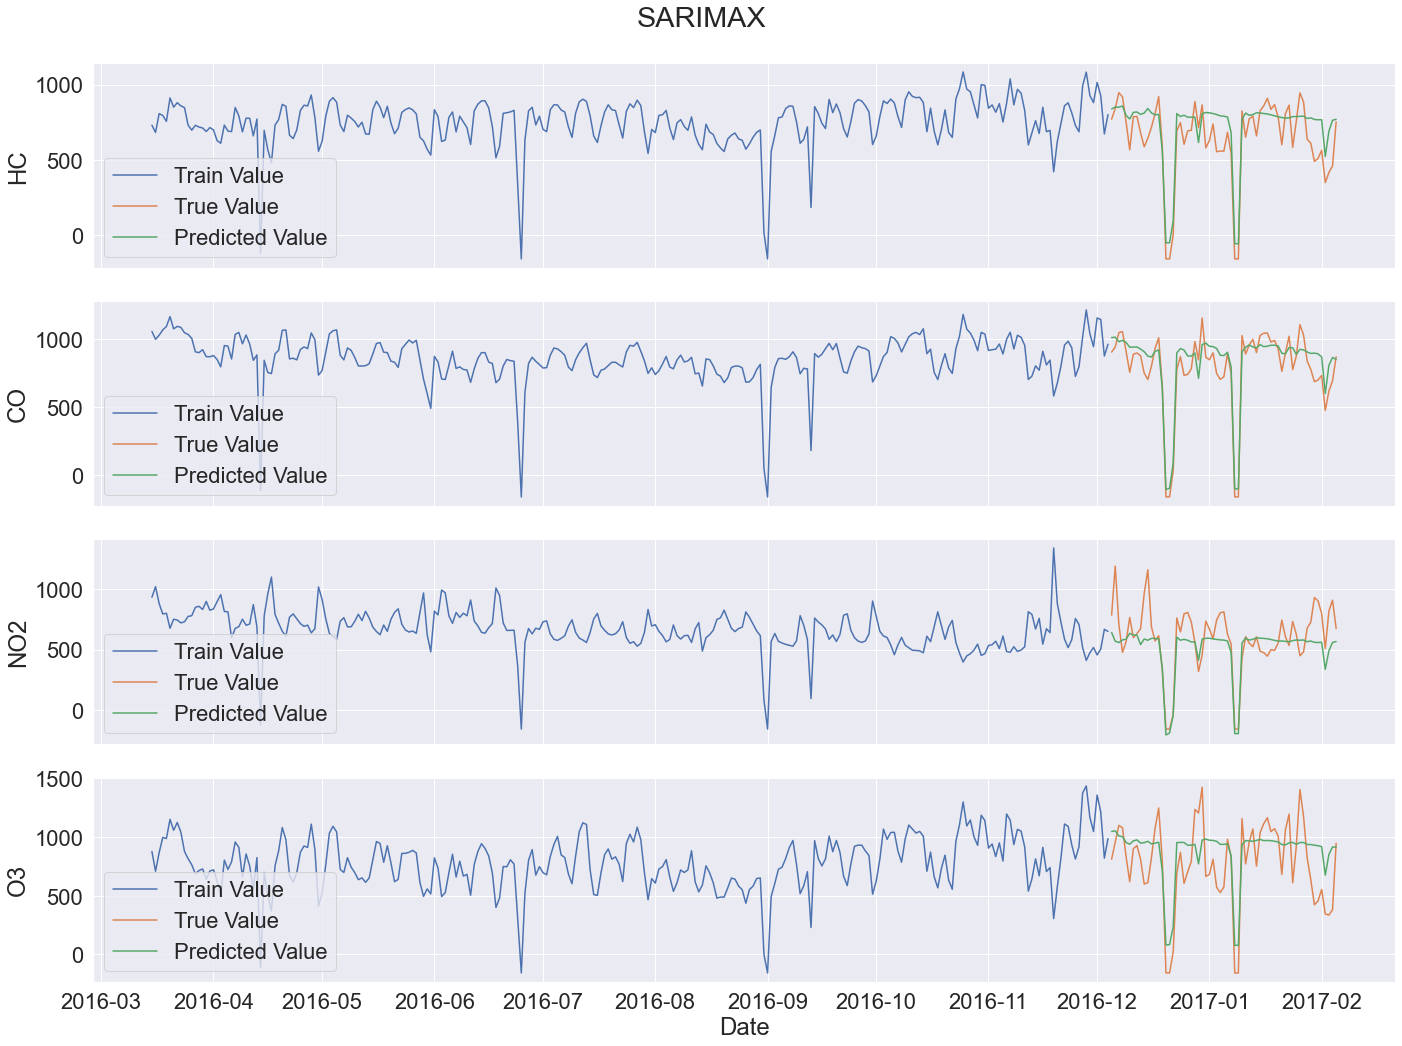

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fig, axes = plt.subplots(4, 1, figsize=(20, 15),sharex=True)
plt.suptitle('SARIMAX')
pred_df = pd.DataFrame(columns=gases,index=eval_set.index)

durbin = {}

for i in range(len(endog)):

    model = SARIMAX(endog=train_set[endog[i]],exog=train_set[exog],enforce_stationarity=True,order=(1, 0, 3),seasonal_order=(1, 0, 3, 12))
    fit_model = model.fit(maxiter=10000)
    fit_model.summary()
    pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])
    durbin[endog[i]]=(durbin_watson(fit_model.resid))
    sns.lineplot(ax=axes[i],data=train_set[endog[i]],label='Train Value')
    sns.lineplot(ax=axes[i],data=eval_set[endog[i]],label='True Value')
    sns.lineplot(ax=axes[i],data=pred,label='Predicted Value')
    pred_df[gases[i]] =pred
    plt.legend(loc='lower left')

fig.show()

#### Durbin-Watson Test Statistic

"The Durbin-Watson statistic lies in the range 0-4. A value of 2 or nearly 2 indicates that there is no first-order autocorrelation. An acceptable range is 1.50 - 2.50."

Since


[Source](https://help.sap.com/saphelp_SCM700_ehp02/helpdata/en/e8/3cc95360267614e10000000a174cb4/content.htm?no_cache=true)

In [186]:
durbin

{'HC': 1.837734460486884,
 'CO': 1.63723073785938,
 'NO2': 1.7126192398908542,
 'O3': 1.9246423024205892}

#### Model Evaluation

In [187]:
metrics(pred_df,eval_set)
results_dict['SARIMAX']=[rmse(pred_df[x],eval_set[x]) for x in pred_df if x!="T" or x!="RH"]


Forecast Accuracy of: HC
rmse   :  140.959

Forecast Accuracy of: CO
rmse   :  109.2043

Forecast Accuracy of: NO2
rmse   :  183.5339

Forecast Accuracy of: O3
rmse   :  264.6668


We can observe the RMSE of CO is good, with it being below 110.
HC comes in at a close second, with the RMSE being 140.

However, NO2 and O3 are not so good on the SARIMAX Model, with the RMSE being above 190 for both.

### Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)

#### Model Exploration

In [188]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(train_set[endog],exog=train_set[exog],order=(1,3),freq='D')
fit_model = model.fit(maxiter=100000,method='nm')
pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


#### Durbin-Watson Test Statistics

In [189]:
durbin_watson(fit_model.resid)

array([1.36978922, 1.36593963, 1.33878694, 1.3954246 ])

#### Model Evaluation

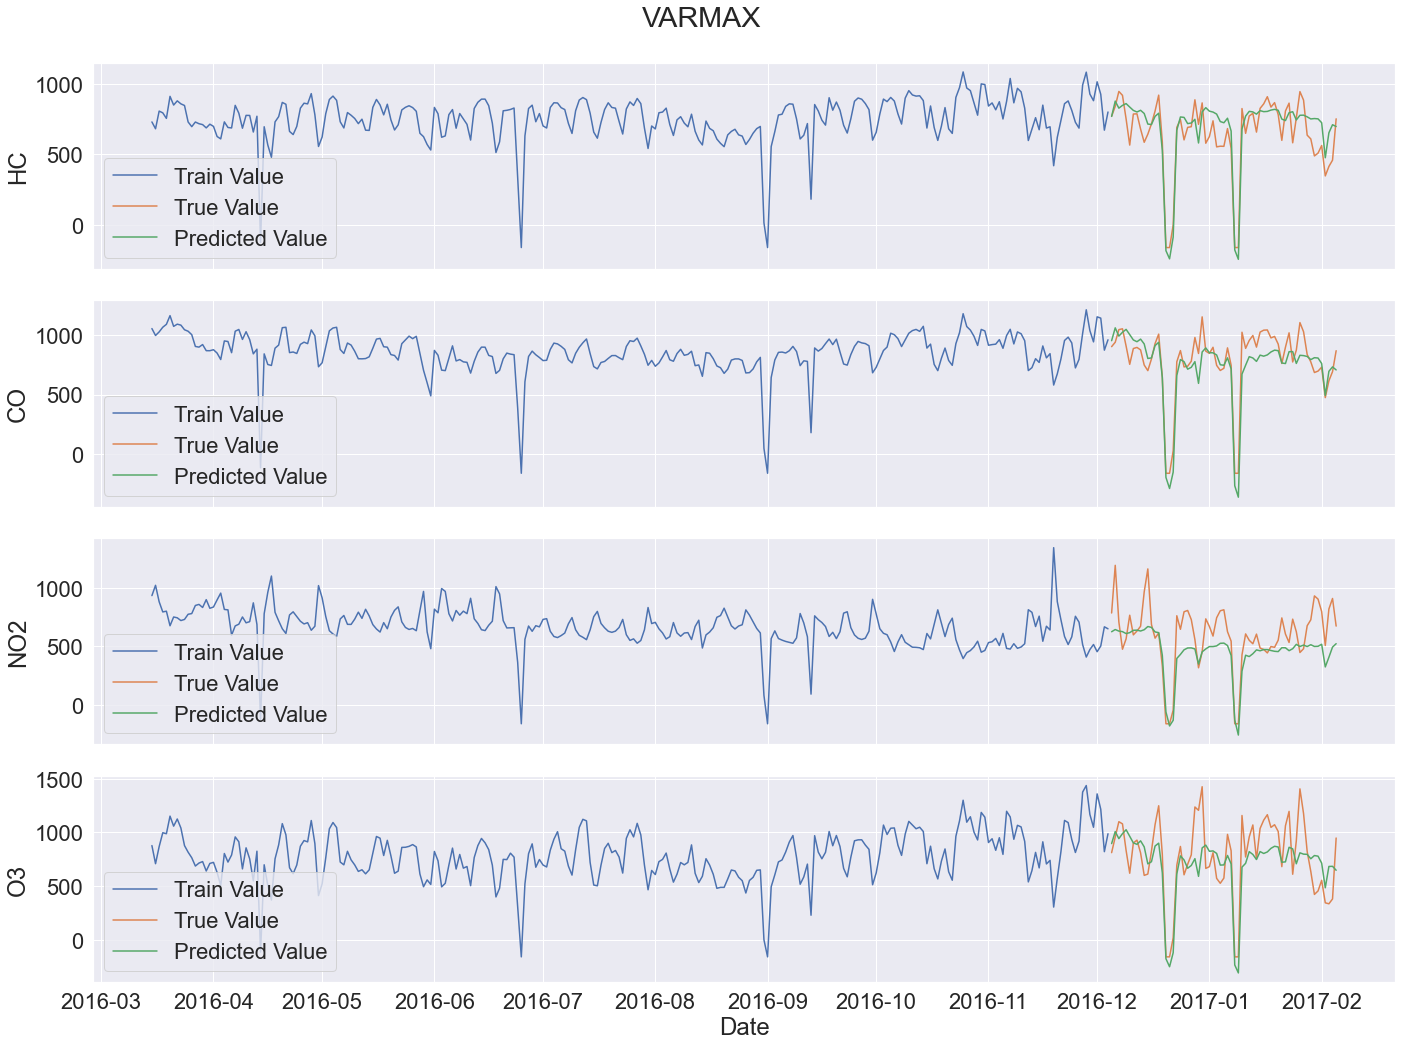

In [190]:
fig, axes = plt.subplots(4, 1, figsize=(20, 15),sharex=True)
for i in range(len(endog)):
    sns.lineplot(ax=axes[i],data=train_set[endog[i]],label='Train Value')
    sns.lineplot(ax=axes[i],data=eval_set[endog[i]],label='True Value')
    sns.lineplot(ax=axes[i],data=pred[endog[i]],label='Predicted Value')

plt.suptitle('VARMAX')
plt.show()

In [191]:
metrics(pred,eval_set)
results_dict['VARMAX']=[rmse(pred[x],eval_set[x]) for x in pred if x!="T" or x!="RH"]


Forecast Accuracy of: HC
rmse   :  128.2497

Forecast Accuracy of: CO
rmse   :  132.9859

Forecast Accuracy of: NO2
rmse   :  208.5985

Forecast Accuracy of: O3
rmse   :  247.7633


### Conclusion

[]

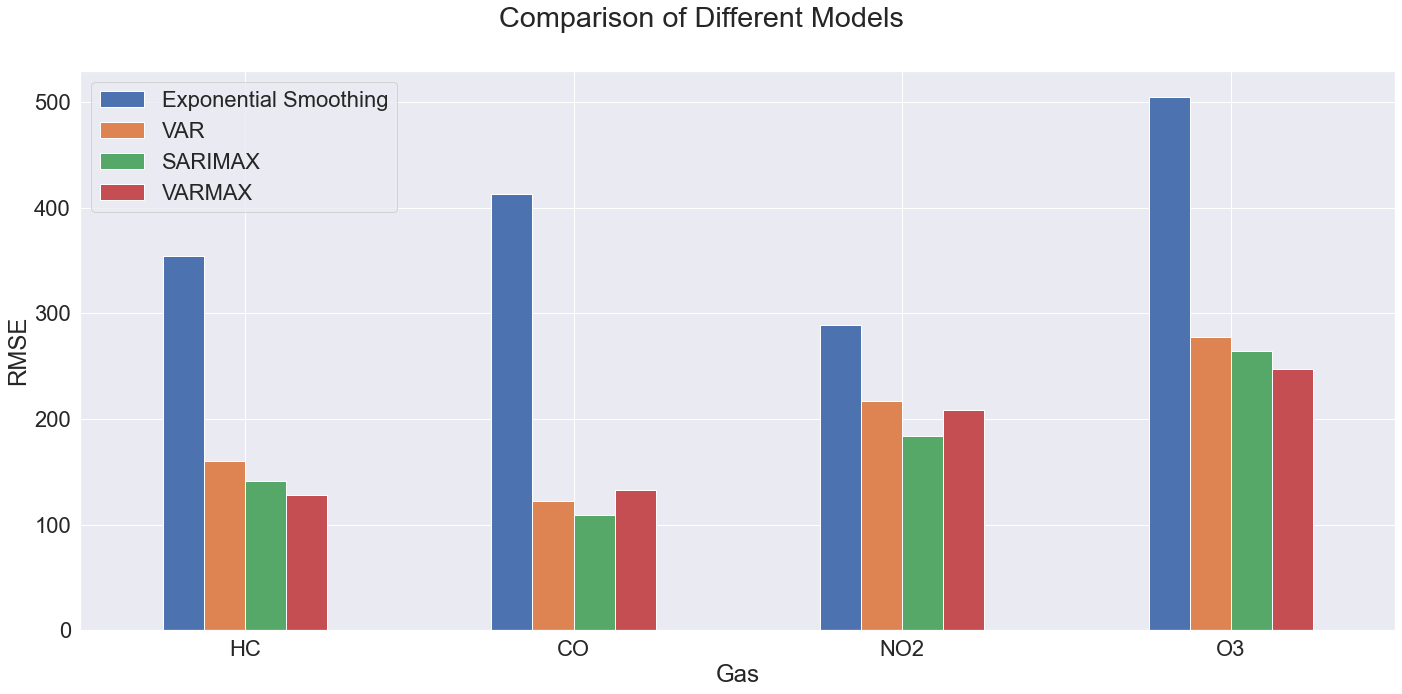

In [192]:
results_df =pd.DataFrame.from_dict(results_dict)


plot = results_df.plot.bar()
plot.set_xticklabels(labels=gases)
plot.set_ylabel('RMSE')
plot.set_xlabel('Gas')
plt.suptitle('Comparison of Different Models')
plt.xticks(rotation=0)
plot.plot()


***


## Model Hyperparameter Tuning



HC: VARMAX
CO: SARIMAX
NO2: SARIMAX
O3: VARMAX

#### CO

Choice of Model: SARIMAX


In [ ]:
### Import Packages ###
import itertools

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = [0,1,2,3]
d = [0,1]
q = [0,1,2,3]
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###
def sarimax_gridsearch(endog,exog, pdq, pdqs, maxiter=1000, freq='D'):

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                model =SARIMAX(endog,exog,
                                order=comb,
                                seasonal_order=combs,
                                enforce_stationarity=True,
                                enforce_invertibility=False,
                                freq=freq)

                fit_model = model.fit(maxiter=maxiter)
                ans.append([comb, combs, fit_model.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    return ans_df

sarimax_gridsearch(train_set['CO'],train_set[exog], pdq, pdqs, freq='D')




C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred 

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


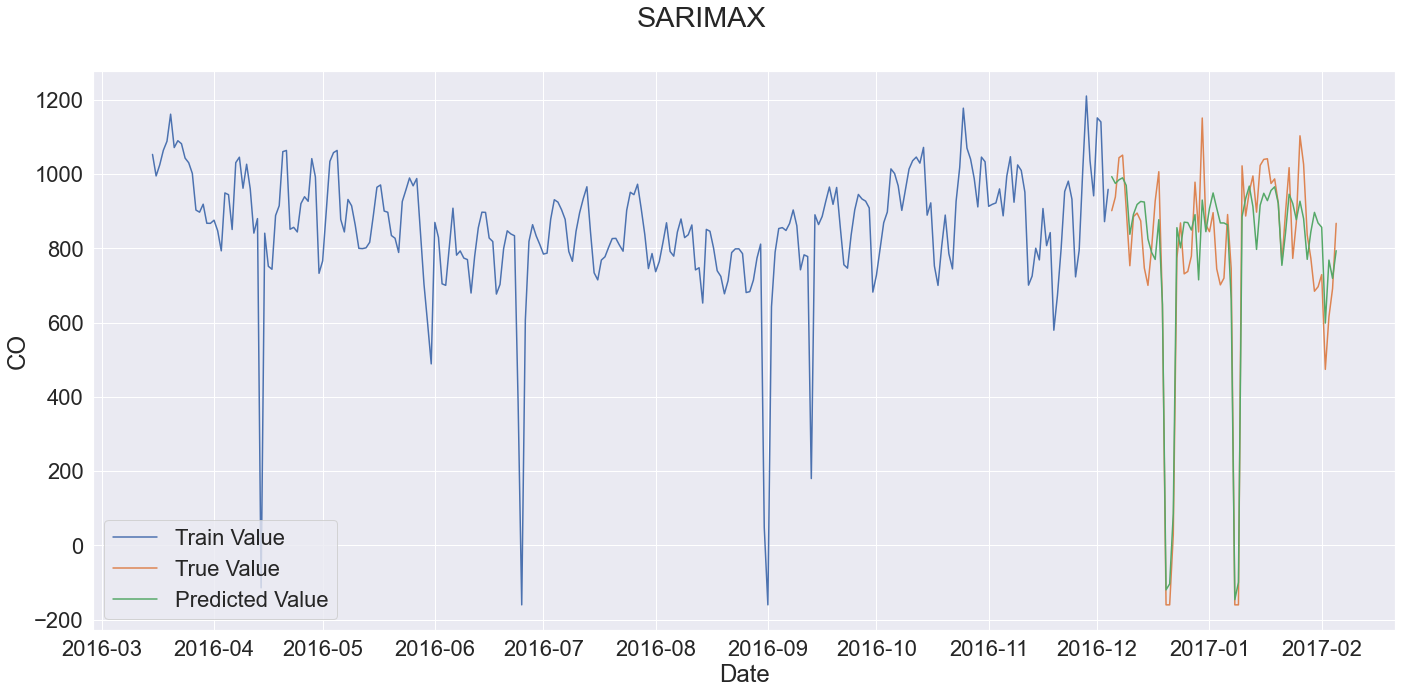

In [194]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fig, axes = plt.subplots(1, 1, figsize=(20, 10),sharex=True)
plt.suptitle('SARIMAX')
pred_df = pd.DataFrame(columns=gases,index=eval_set.index)

durbin = {}


model = SARIMAX(endog=train_set['CO'],exog=train_set[exog],enforce_stationarity=True,order=(1, 0, 0),seasonal_order=(3, 0, 1, 7))
fit_model = model.fit(maxiter=10000)
fit_model.summary()
pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])
durbin['CO']=(durbin_watson(fit_model.resid))
sns.lineplot(data=train_set['CO'],label='Train Value')
sns.lineplot(data=eval_set['CO'],label='True Value')
sns.lineplot(data=pred,label='Predicted Value')
pred_df['CO'] =pred
plt.legend(loc='lower left')

fig.show()

In [195]:
durbin
#### Model Evaluation
metrics(pred_df, eval_set)
results_dict['SARIMAX'] = [rmse(pred_df[x], eval_set[x]) for x in pred_df if x != "T" or x != "RH"]

Forecast Accuracy of: HC
rmse   :  nan

Forecast Accuracy of: CO
rmse   :  101.4841

Forecast Accuracy of: NO2
rmse   :  nan

Forecast Accuracy of: O3
rmse   :  nan


After hyperparameter tuning, we can see that the RMSE for `CO` is `101.5`.

This reduced the RMSE from `109` to `101`.

As such, we will keep the new parameter values:
`order` = `(1, 0, 0)`
`seasonal_order` = `(3, 0, 1, 7)`


#### HC

Choice of Model: SARIMAX

In [196]:
from statsmodels.tsa.statespace.varmax import VARMAX
### Import Packages ###
import itertools

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = [1,2,3]
q = [1,2,3]
pq = list(itertools.product(p, q))


## Run Grid Search ###

def sarimax_gridsearch(endog,exog, pq,maxiter, freq='D'):

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pq:
        model = VARMAX(endog=endog,exog=exog,order=comb,freq=freq)
        fit_model = model.fit(maxiter=maxiter,method='nm')
        ans.append([comb, fit_model.aic])


    ans_df = pd.DataFrame(ans, columns=['pq', 'aic','rmse'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    return ans_df

sarimax_gridsearch(train_set[endog],train_set[exog], pq,maxiter=10000, freq='D')


model = VARMAX(df[endog],exog=df[exog],order=(1,1),freq='D')
fit_model = model.fit(maxiter=10000,method='nm')
start_date=min(df_test.index)
end_date=max(df_test.index)
pred = fit_model.predict(start='2017-02-06',end='2017-04-09',exog=df_test[exog])

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


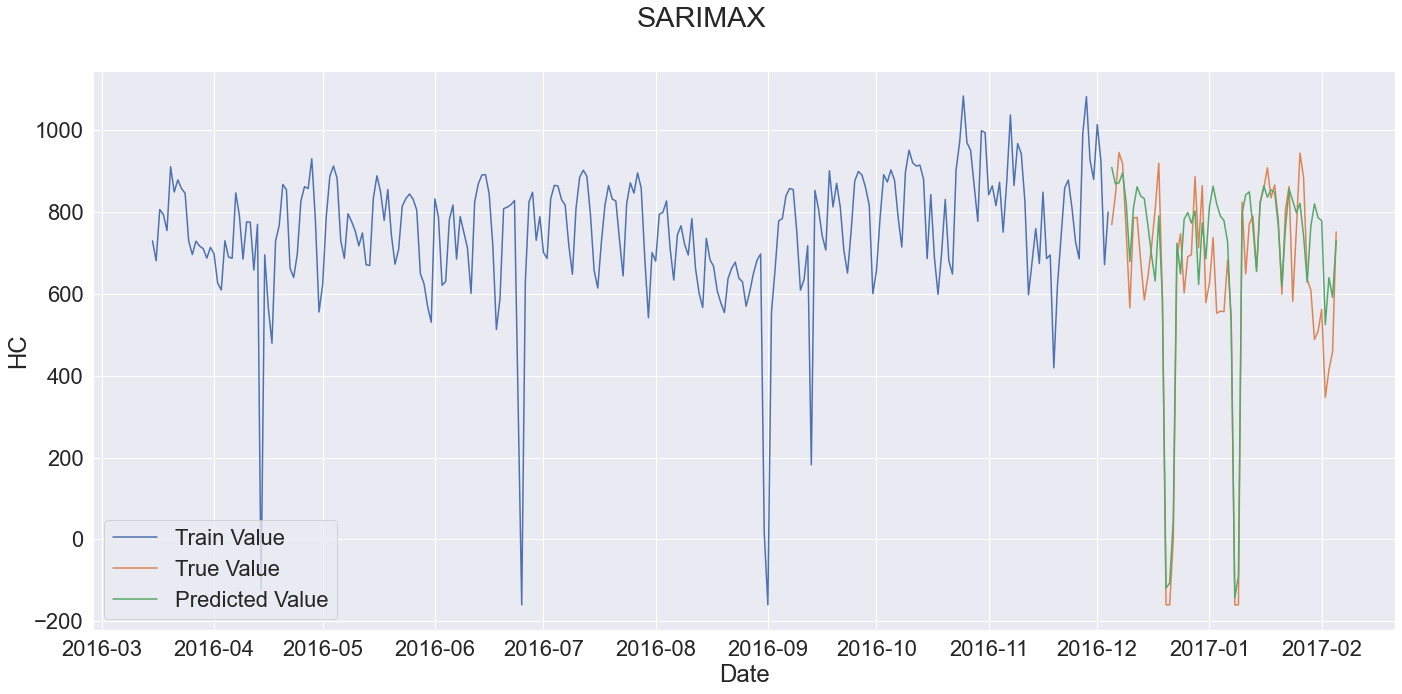

In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fig, axes = plt.subplots(1, 1, figsize=(20, 10),sharex=True)
plt.suptitle('SARIMAX')
pred_df = pd.DataFrame(columns=gases,index=eval_set.index)

durbin = {}


model = SARIMAX(endog=train_set['HC'],exog=train_set[exog],enforce_stationarity=True,order=(0, 0, 0),seasonal_order=(2, 0, 3, 7))
fit_model = model.fit(maxiter=10000)
fit_model.summary()
pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])
durbin['HC']=(durbin_watson(fit_model.resid))
sns.lineplot(data=train_set['HC'],label='Train Value')
sns.lineplot(data=eval_set['HC'],label='True Value')
sns.lineplot(data=pred,label='Predicted Value')
pred_df['HC'] =pred
plt.legend(loc='lower left')

fig.show()

In [198]:
durbin
#### Model Evaluation
metrics(pred_df, eval_set)
results_dict['SARIMAX'] = [rmse(pred_df[x], eval_set[x]) for x in pred_df if x != "T" or x != "RH"]

Forecast Accuracy of: HC
rmse   :  128.8566

Forecast Accuracy of: CO
rmse   :  nan

Forecast Accuracy of: NO2
rmse   :  nan

Forecast Accuracy of: O3
rmse   :  nan


After hyperparameter tuning, we can see that the RMSE for `HC` is `128.9`.

This reduced the RMSE from `140` to `128`.

As such, we will keep the new parameter values:
`order` = `(0, 0, 0)`
`seasonal_order` = `(2, 0, 3, 7)`


#### NO2

Choice of Model: SARIMAX

In [199]:
### Import Packages ###
import itertools

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = [0,1,2,3]
d = [0,1]
q = [0,1,2,3]
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

def sarimax_gridsearch(endog,exog, pdq, pdqs, maxiter=500, freq='D'):

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                model =SARIMAX(endog,exog,
                                order=comb,
                                seasonal_order=combs,
                                enforce_stationarity=True,
                                enforce_invertibility=False,
                                freq=freq)

                fit_model = model.fit(maxiter=maxiter)
                ans.append([comb, combs, fit_model.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    return ans_df

sarimax_gridsearch(train_set['NO2'],train_set[exog], pdq, pdqs, freq='D')


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


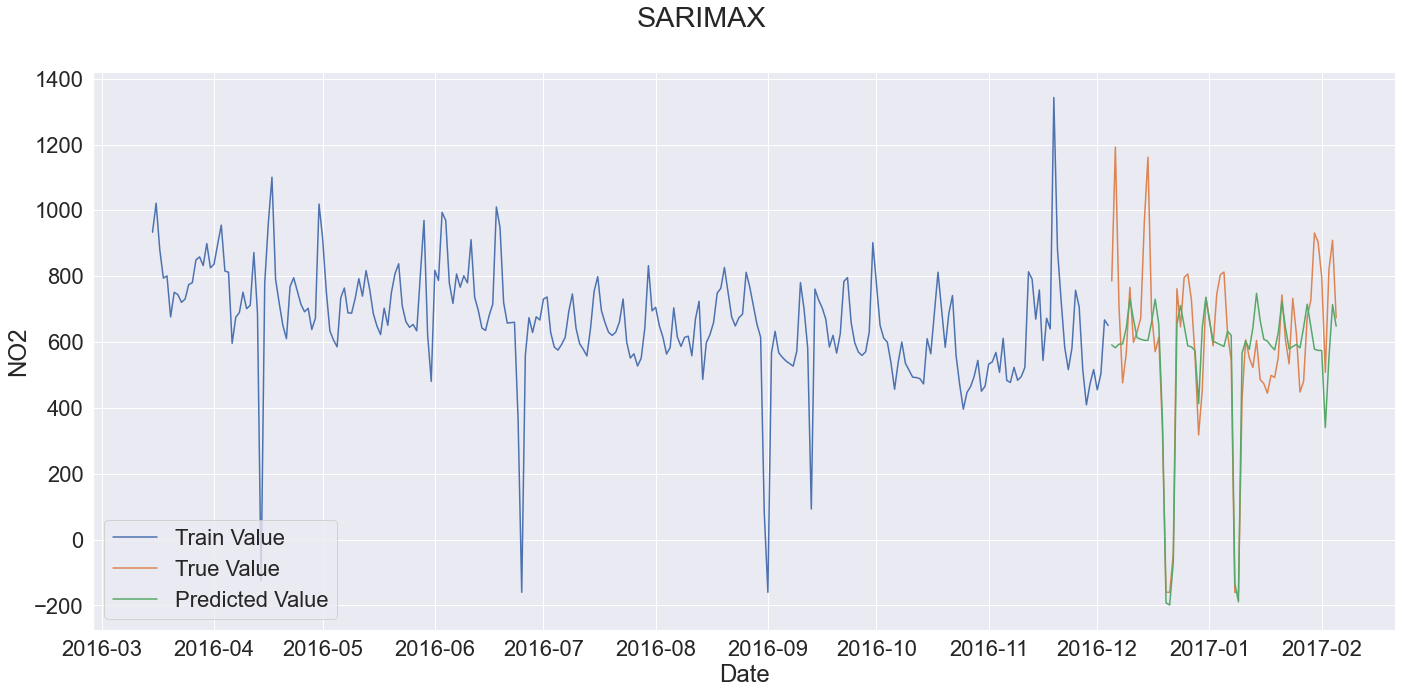

In [200]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fig, axes = plt.subplots(1, 1, figsize=(20, 10),sharex=True)
plt.suptitle('SARIMAX')
pred_df = pd.DataFrame(columns=gases,index=eval_set.index)

durbin = {}



model = SARIMAX(endog=train_set['NO2'],exog=train_set[exog],enforce_stationarity=True,order=(2, 0, 0),seasonal_order=(1, 0, 1, 7))
fit_model = model.fit(maxiter=10000)
fit_model.summary()
pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])
durbin['NO2']=(durbin_watson(fit_model.resid))
sns.lineplot(data=train_set['NO2'],label='Train Value')
sns.lineplot(data=eval_set['NO2'],label='True Value')
sns.lineplot(data=pred,label='Predicted Value')
pred_df['NO2'] =pred
plt.legend(loc='lower left')

fig.show()

In [201]:
durbin
#### Model Evaluation
metrics(pred_df, eval_set)
results_dict['SARIMAX'] = [rmse(pred_df[x], eval_set[x]) for x in pred_df if x != "T" or x != "RH"]

Forecast Accuracy of: HC
rmse   :  nan

Forecast Accuracy of: CO
rmse   :  nan

Forecast Accuracy of: NO2
rmse   :  171.4352

Forecast Accuracy of: O3
rmse   :  nan


After hyperparameter tuning, we can see that the RMSE for `NO2` is `171.4`.

This reduced the RMSE from `183.5` to `171.4`.

As such, we will keep the new parameter values:
`order` = `(2, 0, 0)`
`seasonal_order` = `(1, 0, 1, 7)`


#### O3

Choice of Model: VARMAX

In [202]:
### Import Packages ###
import itertools
from statsmodels.tsa.statespace.varmax import VARMAX


# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = [0,1,2,3]
q = [0,1,2,3]
pq = list(itertools.product(p, q))


### Run Grid Search ###

def sarimax_gridsearch(endog,exog, pq,maxiter, freq='D'):

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pq:
        try:
            model = VARMAX(endog=endog,exog=exog,order=comb,freq=freq)
            fit_model = model.fit(maxiter=maxiter,method='nm')
            ans.append([comb, fit_model.aic])
        except:
            continue

    ans_df = pd.DataFrame(ans, columns=['pq', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    return ans_df

sarimax_gridsearch(train_set['O3'],train_set[exog], pq,maxiter=10000, freq='D')

model = VARMAX(df[endog],exog=df[exog],order=(1,1),freq='D')
fit_model = model.fit(maxiter=10000,method='nm')

pred = fit_model.predict(start='2017-02-06',end='2017-04-09',exog=df_test[exog])

In [203]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(train_set[endog],exog=train_set[exog],order=(1,1),freq='D')
fit_model = model.fit(maxiter=100000,method='nm')
pred = fit_model.forecast(steps=len(eval_set),exog=eval_set[exog])

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


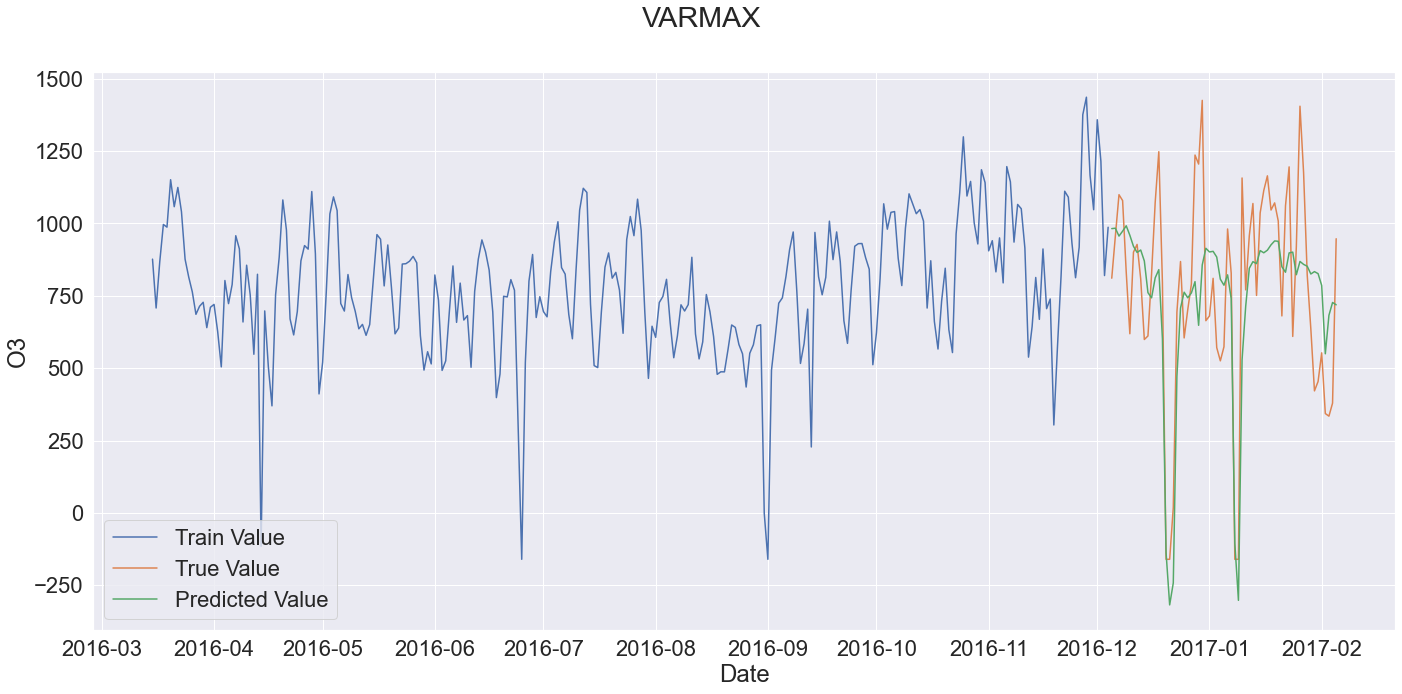

Forecast Accuracy of: HC
rmse   :  124.5479

Forecast Accuracy of: CO
rmse   :  124.1566

Forecast Accuracy of: NO2
rmse   :  203.661

Forecast Accuracy of: O3
rmse   :  252.7643


In [204]:
durbin_watson(fit_model.resid)
fig, axes = plt.subplots(1, 1, figsize=(20, 10),sharex=True)

sns.lineplot(data=train_set['O3'],label='Train Value')
sns.lineplot(data=eval_set['O3'],label='True Value')
sns.lineplot(data=pred['O3'],label='Predicted Value')

plt.suptitle('VARMAX')
plt.legend(loc='lower left')

plt.show()

metrics(pred,eval_set)
results_dict['VARMAX']=[rmse(pred[x],eval_set[x]) for x in pred if x!="T" or x!="RH"]

After hyperparameter tuning, we can see that the RMSE for `O3` is `252.7`.

This did not reduce the RMSE from `247`.

As such, we will *not* keep the new parameter values:
`order` = `(1, 3)`


***


## Model Testing

In [205]:
# SARIMAX for CO
from statsmodels.tsa.statespace.sarimax import SARIMAX
pred_df = pd.DataFrame(columns=gases,index=df_test.index)

durbin = {}


model = SARIMAX(endog=df['CO'],exog=df[exog],enforce_stationarity=True,order=(1, 0, 0),seasonal_order=(3, 0, 1, 7),initialization='approximate_diffuse')
fit_model = model.fit(maxiter=10000)
pred = fit_model.predict(start=min(df_test.index),end=(max(df_test.index)),exog=df_test)
durbin['CO']=(durbin_watson(fit_model.resid))
pred_df['CO'] =pred


# SARIMAX for HC
model = SARIMAX(endog=df['HC'],exog=df[exog],enforce_stationarity=True,order=(0, 0, 0),seasonal_order=(2, 0, 3, 7))
fit_model = model.fit(maxiter=10000)
pred = fit_model.predict(start=min(df_test.index),end=(max(df_test.index)),exog=df_test)
pred_df['HC'] =pred
durbin['HC']=(durbin_watson(fit_model.resid))


# SARIMAX for NO2
model = SARIMAX(endog=df['NO2'],exog=df[exog],enforce_stationarity=True,order=(2, 0, 0),seasonal_order=(1, 0, 1, 7))
fit_model = model.fit(maxiter=10000)
pred = fit_model.predict(start=min(df_test.index),end=(max(df_test.index)),exog=df_test)
durbin['NO2']=(durbin_watson(fit_model.resid))
pred_df['NO2'] =pred

# VARMAX O3
model = VARMAX(df[endog],exog=df[exog],order=(1,3),freq='D')
fit_model = model.fit(maxiter=100000,method='nm')
pred = fit_model.predict(start=min(df_test.index),end=(max(df_test.index)),exog=df_test)
durbin['O3']=(durbin_watson(fit_model.resid))
pred_df['O3'] =pred['O3']

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency 

C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [206]:
pred_df

HC          CO         NO2           O3
Date                                                       
2017-02-06  749.760096  951.141158  619.508814  1197.655784
2017-02-07  725.651147  903.688925  651.683040  1022.980123
2017-02-08  753.177340  900.064169  609.435034   973.383740
2017-02-09  762.729565  891.815583  584.100171   957.700045
2017-02-10  671.530011  867.133715  595.349428   935.597886
...                ...         ...         ...          ...
2017-04-05  794.851739  854.038054  644.365623   967.042193
2017-04-06  774.610949  823.186982  623.435128   888.193062
2017-04-07  691.722687  786.007500  643.098319   834.847880
2017-04-08  614.865439  710.566893  758.303461   811.594274
2017-04-09  749.275520  818.647403  655.202757   830.076031

[63 rows x 4 columns]

In [207]:
pred_df=pred_df[['CO','HC','NO2','O3']]
pred_df = pred_df.reset_index()
pred_df = pd.melt(pred_df, id_vars='Date', value_vars=['CO','HC','NO2','O3'])

pred_df.to_csv('../forecast.csv')


## Conclusion

We used 2 types of models:
1. VARMAX
2. SARIMAX


The results from the hyperparameter tuning of SARIMAX reduced the RMSE by an average of 30, whereas the results from the hyperparameter tuning of VARMAX increased the RMSE by 10, hence I did not include it.

HC: `128.85`
CO: `101.4841`
NO2: `171.4`
O3: `252.7`

Therefore, we can see that the model perfornms well with HC and CO gases, but the unpredictability in the trends and seasonality of the NO2 and O3 data present a challenge for both the SARIMAX and VARMAX models.